In [1]:
import os
import sys

import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from matplotlib.collections import PatchCollection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd
import seaborn as sns
import json
from natsort import natsorted

# Read the Adelaide and Worldwide data

We read the Adelaide data, and create a column called 'geo_loc_name_country_calc' that we set to "Adelaide" for every entry. Then we read the world wide data

In [2]:
adl = pd.read_csv("C:\\Users\\edwa0468\\OneDrive - Flinders\\Projects\\CF\\Adelaide\\subsystems\\level2_norm_ss.tsv", delimiter="\t")
adl = adl.set_index("Unnamed: 0")
adl = adl.reindex(natsorted(adl.columns), axis=1)
adl = adl.T
adl['geo_loc_name_country_calc'] = "Adelaide"
adl.head(3)

Unnamed: 0         Amino Acids and Derivatives;   \
623361_20180123_S                    1182.347902   
634207_20180510_S                    1547.319643   
634207_20180517_S                    1276.273834   

Unnamed: 0         Amino Acids and Derivatives; Alanine, serine, and glycine  \
623361_20180123_S                                        2934.411456           
634207_20180510_S                                        4149.806390           
634207_20180517_S                                        3771.513090           

Unnamed: 0         Amino Acids and Derivatives; Arginine; urea cycle, creatine, polyamines  \
623361_20180123_S                                        9058.024354                         
634207_20180510_S                                       10620.637379                         
634207_20180517_S                                        7642.596780                         

Unnamed: 0         Amino Acids and Derivatives; Aromatic amino acids and derivatives  \
623361_20180123_S                                       17292.417136                   
634207_20180510_S                                        9983.781882                   
634207_20180517_S                                       12117.668359                   

Unnamed: 0         Amino Acids and Derivatives; Branched-chain amino acids  \
623361_20180123_S                                        9988.973643         
634207_20180510_S                                        4824.133002         
634207_20180517_S                                        7237.676337         

Unnamed: 0         Amino Acids and Derivatives; Glutamine, glutamate, aspartate, asparagine; ammonia assimilation  \
623361_20180123_S                                        5854.713004                                                
634207_20180510_S                                        6270.366907                                                
634207_20180517_S                                        7658.802027                                                

Unnamed: 0         Amino Acids and Derivatives; Histidine Metabolism  \
623361_20180123_S                                        5343.125180   
634207_20180510_S                                        4669.202444   
634207_20180517_S                                        4423.884915   

Unnamed: 0         Amino Acids and Derivatives; Lysine, threonine, methionine, and cysteine  \
623361_20180123_S                                       17334.572048                          
634207_20180510_S                                       16859.351724                          
634207_20180517_S                                       15807.596776                          

Unnamed: 0         Amino Acids and Derivatives; Proline and 4-hydroxyproline  \
623361_20180123_S                                        3624.573283           
634207_20180510_S                                        2862.374341           
634207_20180517_S                                        2826.477454           

Unnamed: 0         Carbohydrates;   ...  \
623361_20180123_S         2.097756  ...   
634207_20180510_S         1.624862  ...   
634207_20180517_S         7.080576  ...   

Unnamed: 0         Stress Response, Defense and Virulence; Host-pathogen interactions  \
623361_20180123_S                                          77.616984                    
634207_20180510_S                                          66.619328                    
634207_20180517_S                                           0.000000                    

Unnamed: 0         Stress Response, Defense and Virulence; Invasion and intracellular resistance  \
623361_20180123_S                                         611.495965                               
634207_20180510_S                                          14.623755                               
634207_20180517_S                                          56.644608                               

Unnamed: 0         Stress Response, 

Read the worldwide data and set the acccession 

In [3]:
wlt = pd.read_csv("C:\\Users\\edwa0468\\OneDrive - Flinders\\Projects\\CF\\OtherSequences\\subsystems\\level2_norm_ss.tsv", delimiter="\t")
wlt = wlt.rename(columns={"Unnamed: 0":"Accession"})
wlt = wlt.set_index('Accession')
wlt = wlt.reindex(natsorted(wlt.columns), axis=1)
wlt = wlt.T
wlt

Accession    Amino Acids and Derivatives;   \
SRR1177122                      815.700596   
SRR1180012                      953.558394   
SRR1180013                      564.102476   
SRR3284698                      367.839874   
SRR3284701                      173.671453   
...                                    ...   
SRR24155132                    1536.428793   
SRR24155134                    1694.431984   
SRR24155135                    2400.409020   
SRR24155136                    1730.186405   
SRR24155138                    1706.258282   

Accession    Amino Acids and Derivatives; Alanine, serine, and glycine  \
SRR1177122                                         4010.859516           
SRR1180012                                         3298.626853           
SRR1180013                                         4982.905201           
SRR3284698                                         5392.074113           
SRR3284701                                         2797.162945           
...                                                        ...           
SRR24155132                                        3619.669166           
SRR24155134                                        4042.399629           
SRR24155135                                        3579.976827           
SRR24155136                                        3117.823993           
SRR24155138                                        3587.327732           

Accession    Amino Acids and Derivatives; Arginine; urea cycle, creatine, polyamines  \
SRR1177122                                        15304.134791                         
SRR1180012                                        12712.589278                         
SRR1180013                                        19941.694061                         
SRR3284698                                        23070.218309                         
SRR3284701                                         6299.537245                         
...                                                        ...                         
SRR24155132                                       18421.642995                         
SRR24155134                                       17833.330790                         
SRR24155135                                        6477.041095                         
SRR24155136                                       14885.893006                         
SRR24155138                                       15743.571090                         

Accession    Amino Acids and Derivatives; Aromatic amino acids and derivatives  \
SRR1177122                                        17587.300655                   
SRR1180012                                        18503.029803                   
SRR1180013                                        15351.645942                   
SRR3284698                                        11326.630175                   
SRR3284701                                         7178.420051                   
...                                                        ...                   
SRR24155132                                       15379.672419                   
SRR24155134                                       17875.064172                   
SRR24155135                                       25314.636781                   
SRR24155136                                       18841.508075                   
SRR24155138                                       18422.585137                   

Accession    Amino Acids and Derivatives; Branched-chain amino acids  \
SRR1177122                                        11873.417456         
SRR1180012                                        10920.127893         
SRR1180013                                        12701.035857         
SRR3284698                                        11495.378082         
SRR3284701                                         3930.763883         
...                                                        ...         
SRR24155132 

## Remove some 16S data

Some of the libararies are just 16S sequences, so we need to remove those. I scanned the 16S database from partie

In [4]:
six = pd.read_csv("C:\\Users\\edwa0468\\OneDrive - Flinders\\Projects\\CF\\OtherSequences\\16S.tsv", delimiter="\t")
sr = six[six["Aligned 1 time"] > 1]
wlt = wlt[~wlt.index.isin(sr['Run'])]

## Read the worldwide metadata

We really only want the `geo_loc_name_country_calc` column at the moment, but we may use some other stuff later

In [5]:
wmd = pd.read_csv("C:\\Users\\edwa0468\\OneDrive - Flinders\\Projects\\CF\\OtherSequences\\bq-results-20230813-093918-1691921491006.tsv", delimiter="\t")
wma = wmd[['Accession', 'geo_loc_name_country_calc']]
wma = wma.set_index("Accession")
wma.head(3)

geo_loc_name_country_calc
Accession                            
ERR10814733                   Germany
ERR10814734                   Germany
ERR10814735                   Germany

## Merge the worldwide data and their location. 

We use an inner join to just keep entries with measurements

In [6]:
wldj = wlt.join(wma,  how='inner')
wldj.head(3)

Amino Acids and Derivatives;   \
SRR1177122                     815.700596   
SRR1180012                     953.558394   
SRR1180013                     564.102476   

            Amino Acids and Derivatives; Alanine, serine, and glycine  \
SRR1177122                                        4010.859516           
SRR1180012                                        3298.626853           
SRR1180013                                        4982.905201           

            Amino Acids and Derivatives; Arginine; urea cycle, creatine, polyamines  \
SRR1177122                                       15304.134791                         
SRR1180012                                       12712.589278                         
SRR1180013                                       19941.694061                         

            Amino Acids and Derivatives; Aromatic amino acids and derivatives  \
SRR1177122                                       17587.300655                   
SRR1180012                                       18503.029803                   
SRR1180013                                       15351.645942                   

            Amino Acids and Derivatives; Branched-chain amino acids  \
SRR1177122                                       11873.417456         
SRR1180012                                       10920.127893         
SRR1180013                                       12701.035857         

            Amino Acids and Derivatives; Glutamine, glutamate, aspartate, asparagine; ammonia assimilation  \
SRR1177122                                        4695.479584                                                
SRR1180012                                        4879.706610                                                
SRR1180013                                        4118.523686                                                

            Amino Acids and Derivatives; Histidine Metabolism  \
SRR1177122                                        6901.224945   
SRR1180012                                        6304.676867   
SRR1180013                                        6831.012359   

            Amino Acids and Derivatives; Lysine, threonine, methionine, and cysteine  \
SRR1177122                                       18034.657009                          
SRR1180012                                       17650.537179                          
SRR1180013                                       20416.096568                          

            Amino Acids and Derivatives; Proline and 4-hydroxyproline  \
SRR1177122                                        4342.710392           
SRR1180012                                        3878.755792           
SRR1180013                                        5701.464306           

            Carbohydrates;   ...  \
SRR1177122              0.0  ...   
SRR1180012              0.0  ...   
SRR1180013              0.0  ...   

            Stress Response, Defense and Virulence; Host-pathogen interactions  \
SRR1177122                                          19.099331                    
SRR1180012                                           6.851917                    
SRR1180013                                           0.000000                    

            Stress Response, Defense and Virulence; Invasion and intracellular resistance  \
SRR1177122                                         162.344314                               
SRR1180012                                         171.297915                               
SRR1180013                                         483.516408                               

            Stress Response, Defense and Virulence; Resistance to antibiotics and toxic compounds  \
SRR1177122                                       45799.399999                                       
SRR1180012                                       47160.029025                                       
SRR1180013                                       43407.685493                    

## Concatenate the Adelaide and worldwide data to get a single matrix

Note that the worldwide data appears to have two (?) additional columns that are not in the Adelaide data frame, but they don't seem to contribute a lot. We should probably drop them!

In [7]:
comb = pd.concat([adl, wldj], axis=0)
comb = comb.drop(['Carbohydrates; CO', 'Membrane Transport; Multid'], axis=1)
comb

Amino Acids and Derivatives;   \
623361_20180123_S                    1182.347902   
634207_20180510_S                    1547.319643   
634207_20180517_S                    1276.273834   
639354_20171206_S                     709.462968   
642660_20180601_S                     910.075437   
...                                          ...   
SRR24155132                          1536.428793   
SRR24155134                          1694.431984   
SRR24155135                          2400.409020   
SRR24155136                          1730.186405   
SRR24155138                          1706.258282   

                   Amino Acids and Derivatives; Alanine, serine, and glycine  \
623361_20180123_S                                        2934.411456           
634207_20180510_S                                        4149.806390           
634207_20180517_S                                        3771.513090           
639354_20171206_S                                        5869.914274           
642660_20180601_S                                        2753.645446           
...                                                              ...           
SRR24155132                                              3619.669166           
SRR24155134                                              4042.399629           
SRR24155135                                              3579.976827           
SRR24155136                                              3117.823993           
SRR24155138                                              3587.327732           

                   Amino Acids and Derivatives; Arginine; urea cycle, creatine, polyamines  \
623361_20180123_S                                        9058.024354                         
634207_20180510_S                                       10620.637379                         
634207_20180517_S                                        7642.596780                         
639354_20171206_S                                       23266.509937                         
642660_20180601_S                                       10822.257045                         
...                                                              ...                         
SRR24155132                                             18421.642995                         
SRR24155134                                             17833.330790                         
SRR24155135                                              6477.041095                         
SRR24155136                                             14885.893006                         
SRR24155138                                             15743.571090                         

                   Amino Acids and Derivatives; Aromatic amino acids and derivatives  \
623361_20180123_S                                       17292.417136                   
634207_20180510_S                                        9983.781882                   
634207_20180517_S                                       12117.668359                   
639354_20171206_S                                       11103.469773                   
642660_20180601_S                                       23311.328505                   
...                                                              ...                   
SRR24155132                                             15379.672419                   
SRR24155134                                             17875.064172                   
SRR24155135                                             25314.636781                   
SRR24155136                                             18841.508075                   
SRR24155138                                             18422.585137                   

                   Amino Acids and Derivatives; Branched-chain amino acids  \
623361_20180123_S                                        9988.973643         
634207_20180510_S                                        4824.133002         
634207_201805

Of course, we don't want a single matrix because we want the labels separately, so we pull them out into a separate matrix that we'll use later

In [8]:
locs = comb[['geo_loc_name_country_calc']]
locs = locs.rename(columns={"geo_loc_name_country_calc": "Country"})
locs

Country
623361_20180123_S  Adelaide
634207_20180510_S  Adelaide
634207_20180517_S  Adelaide
639354_20171206_S  Adelaide
642660_20180601_S  Adelaide
...                     ...
SRR24155132             USA
SRR24155134             USA
SRR24155135             USA
SRR24155136             USA
SRR24155138             USA

[611 rows x 1 columns]

In [9]:
df = comb.drop(['geo_loc_name_country_calc'], axis=1)
df

Amino Acids and Derivatives;   \
623361_20180123_S                    1182.347902   
634207_20180510_S                    1547.319643   
634207_20180517_S                    1276.273834   
639354_20171206_S                     709.462968   
642660_20180601_S                     910.075437   
...                                          ...   
SRR24155132                          1536.428793   
SRR24155134                          1694.431984   
SRR24155135                          2400.409020   
SRR24155136                          1730.186405   
SRR24155138                          1706.258282   

                   Amino Acids and Derivatives; Alanine, serine, and glycine  \
623361_20180123_S                                        2934.411456           
634207_20180510_S                                        4149.806390           
634207_20180517_S                                        3771.513090           
639354_20171206_S                                        5869.914274           
642660_20180601_S                                        2753.645446           
...                                                              ...           
SRR24155132                                              3619.669166           
SRR24155134                                              4042.399629           
SRR24155135                                              3579.976827           
SRR24155136                                              3117.823993           
SRR24155138                                              3587.327732           

                   Amino Acids and Derivatives; Arginine; urea cycle, creatine, polyamines  \
623361_20180123_S                                        9058.024354                         
634207_20180510_S                                       10620.637379                         
634207_20180517_S                                        7642.596780                         
639354_20171206_S                                       23266.509937                         
642660_20180601_S                                       10822.257045                         
...                                                              ...                         
SRR24155132                                             18421.642995                         
SRR24155134                                             17833.330790                         
SRR24155135                                              6477.041095                         
SRR24155136                                             14885.893006                         
SRR24155138                                             15743.571090                         

                   Amino Acids and Derivatives; Aromatic amino acids and derivatives  \
623361_20180123_S                                       17292.417136                   
634207_20180510_S                                        9983.781882                   
634207_20180517_S                                       12117.668359                   
639354_20171206_S                                       11103.469773                   
642660_20180601_S                                       23311.328505                   
...                                                              ...                   
SRR24155132                                             15379.672419                   
SRR24155134                                             17875.064172                   
SRR24155135                                             25314.636781                   
SRR24155136                                             18841.508075                   
SRR24155138                                             18422.585137                   

                   Amino Acids and Derivatives; Branched-chain amino acids  \
623361_20180123_S                                        9988.973643         
634207_20180510_S                                        4824.133002         
634207_201805

# Start the PCA!

Standardise the data

In [10]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled

array([[ 3.57661349e-01, -5.21818260e-01, -9.09229129e-01, ...,
        -4.50784841e-01, -3.70558960e-01, -6.35200720e-01],
       [ 1.15877246e+00,  2.39985379e-01, -7.33694559e-01, ...,
        -9.64815558e-01, -4.34496030e-01, -1.05084348e+00],
       [ 5.63828291e-01,  2.87297679e-03, -1.06822977e+00, ...,
        -9.17734913e-01, -3.90954361e-01, -1.01540921e+00],
       ...,
       [ 3.03129929e+00, -1.17181022e-01, -1.19916130e+00, ...,
        -1.37890151e+00, -4.49334155e-01, -6.54207759e-01],
       [ 1.56016407e+00, -4.06856173e-01, -2.54561338e-01, ...,
        -8.57233237e-01, -4.49447443e-01, -5.08914743e-01],
       [ 1.50764196e+00, -1.12573511e-01, -1.58214929e-01, ...,
        -1.09372138e+00, -4.48599835e-01, -1.53884259e-01]])

In [11]:
pca = PCA(n_components=4)
pca.fit(df_scaled)
dft_pca = pca.transform(df_scaled)
zipped = list(zip(dft_pca[:,0],
                  dft_pca[:,1],
                  dft_pca[:,2],
                  dft_pca[:,3],
                  list(df.index),
                 ))
pct_df = pd.DataFrame(zipped, columns=['PC1', 'PC2', 'PC3', 'PC4', "Accession"])
pct_df.head(3)

PC1       PC2       PC3       PC4          Accession
0 -4.593643 -0.551777 -0.377213 -2.068666  623361_20180123_S
1 -2.944429 -3.316298  0.556905  0.688531  634207_20180510_S
2 -2.803766 -2.585857  0.515813  0.006482  634207_20180517_S

In [12]:
pcloc = pct_df.set_index("Accession").join(locs, how="inner")
pcloc = pcloc[pcloc['Country'] != 'uncalculated']
pcloc

PC1       PC2       PC3       PC4   Country
623361_20180123_S -4.593643 -0.551777 -0.377213 -2.068666  Adelaide
634207_20180510_S -2.944429 -3.316298  0.556905  0.688531  Adelaide
634207_20180517_S -2.803766 -2.585857  0.515813  0.006482  Adelaide
639354_20171206_S  5.678833 -1.348430 -2.439921 -2.150585  Adelaide
642660_20180601_S -5.672878 -1.060547 -0.920754 -3.737580  Adelaide
...                     ...       ...       ...       ...       ...
SRR24155132       -1.173006 -3.658529  0.470793  4.896840       USA
SRR24155134       -2.207711 -3.566371 -1.200697  3.333108       USA
SRR24155135       -5.296156 -5.508610 -1.614638  2.855363       USA
SRR24155136       -4.098361 -4.407928 -0.464878  3.864302       USA
SRR24155138       -2.990201 -4.157728 -1.141281  4.732392       USA

[611 rows x 5 columns]

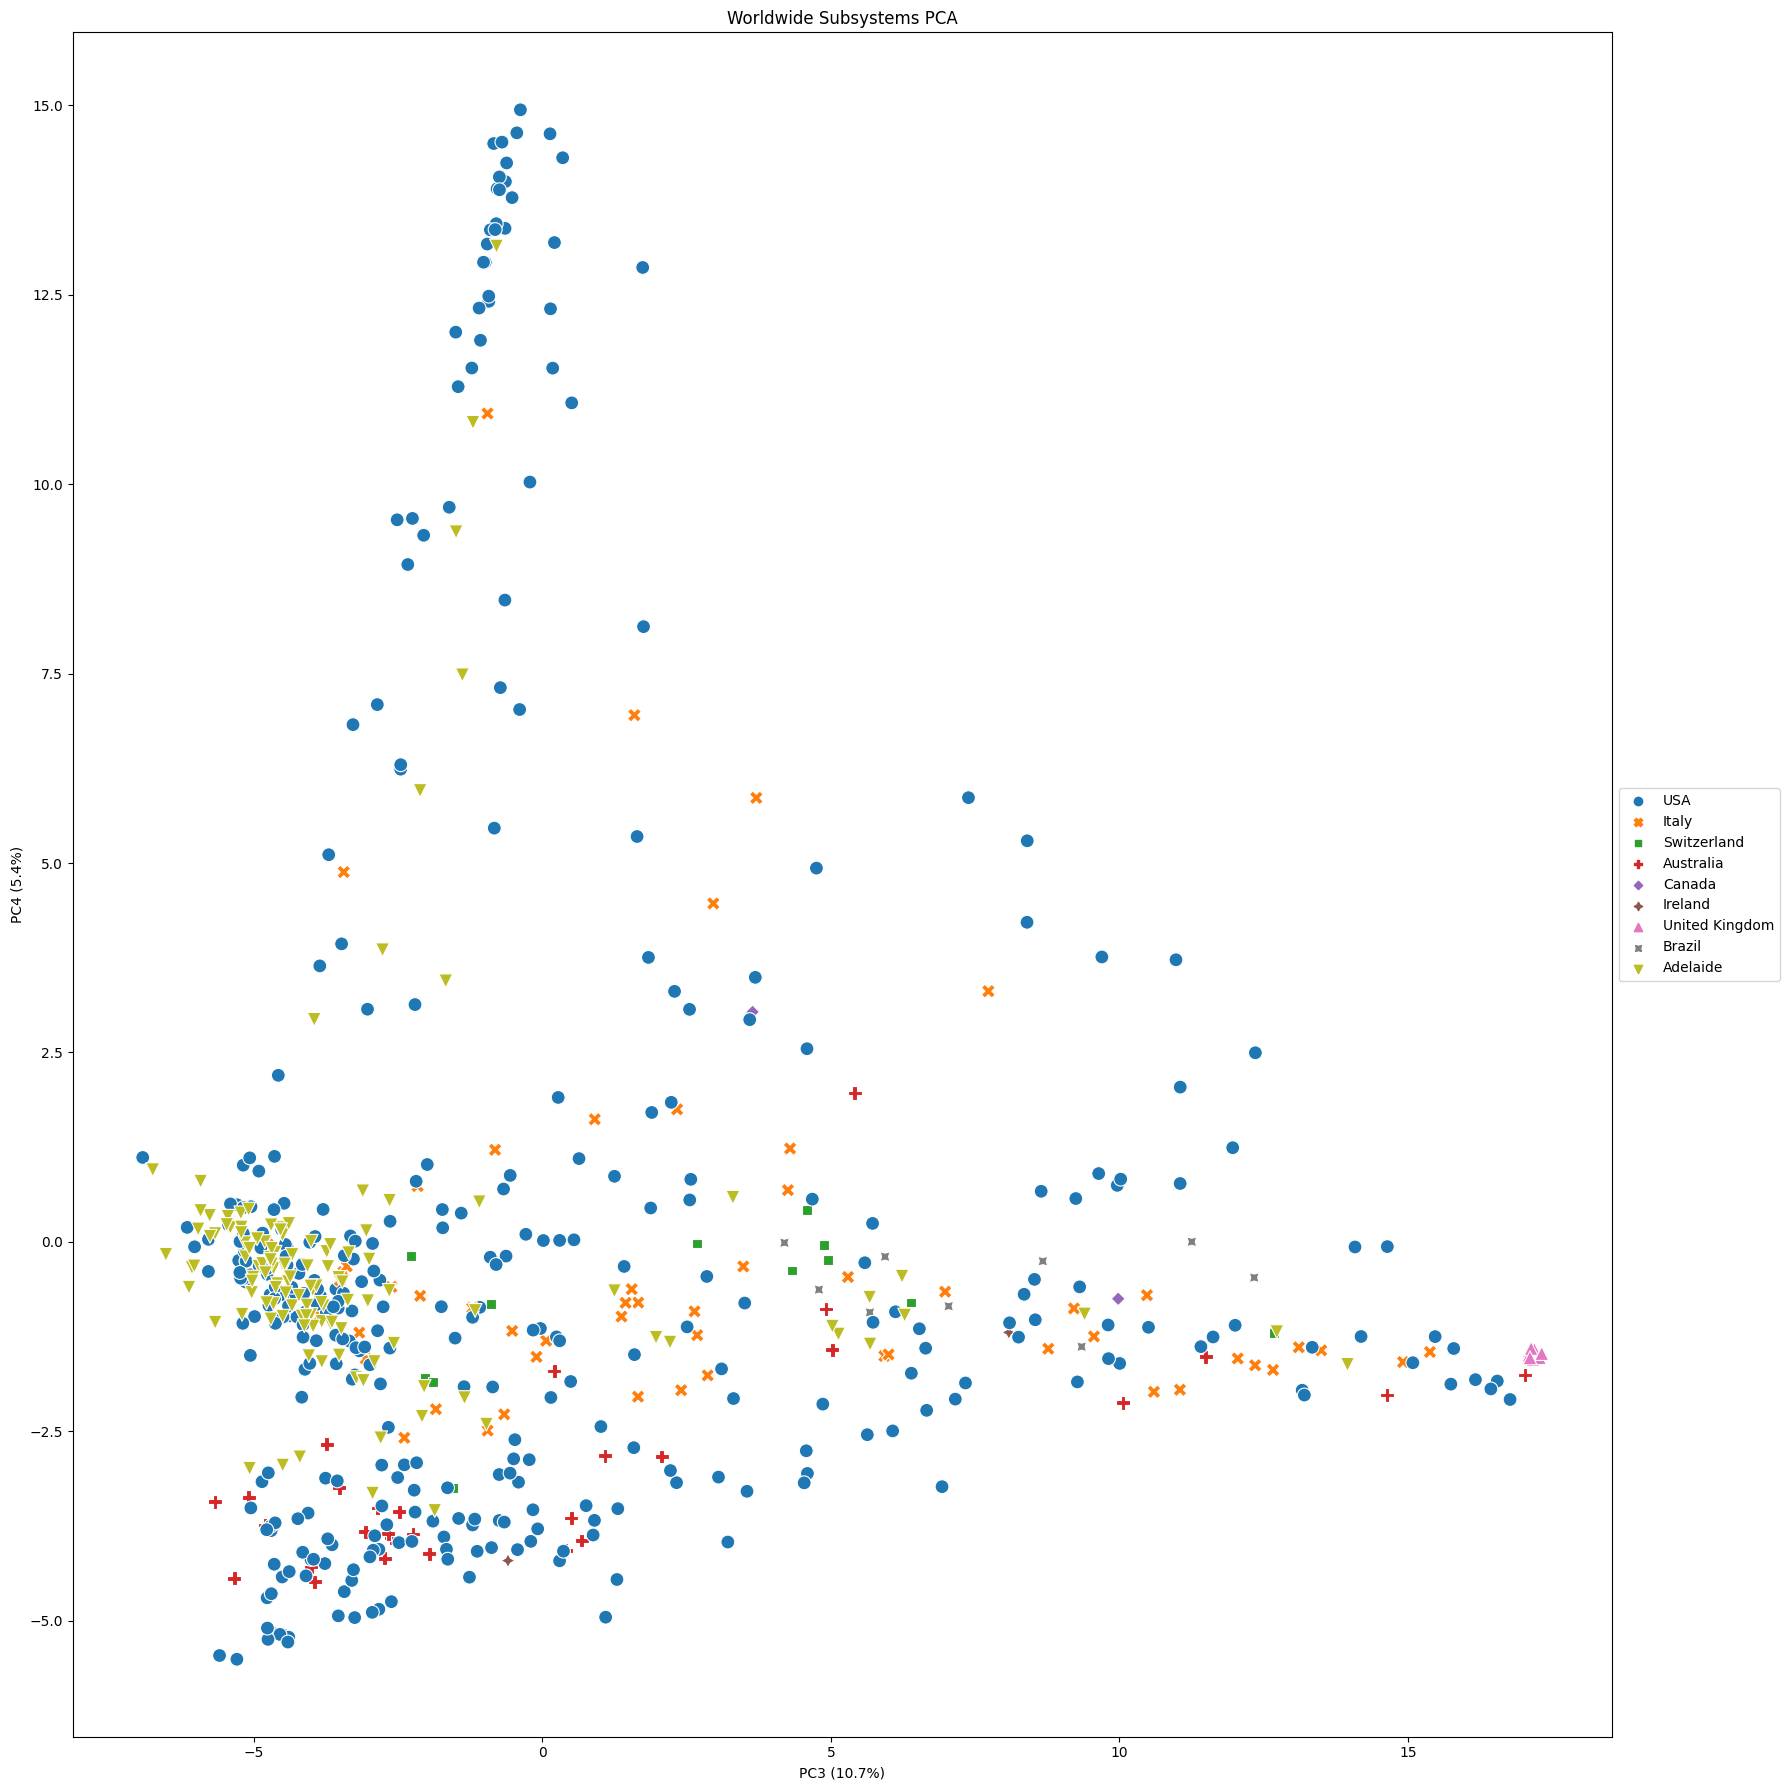

In [13]:
fig, ax = plt.subplots(figsize=(18, 18))
# pd.concat([df[df['label'] != 'dog'], df[df['label'] == 'dog']]).
dfat = pd.concat([pcloc[pcloc['Country'] != "Adelaide"], pcloc[pcloc['Country'] == "Adelaide"]])
sns.scatterplot(x="PC1", y="PC2", hue='Country', style='Country', legend=True, data=dfat, ax=ax, s=100)
l = ax.set_xlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)")
l = ax.set_ylabel(f"PC4 ({pca.explained_variance_ratio_[3]*100:.1f}%)")
t = ax.set_title(f"Worldwide Subsystems PCA")
ax.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
fig.savefig("Worldwide_ss.png")

## Loadings


In [14]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=df.columns)
loadings.head(3)

PC1       PC2  \
Amino Acids and Derivatives;                       -0.103517 -0.107579   
Amino Acids and Derivatives; Alanine, serine, a...  0.134093  0.038651   
Amino Acids and Derivatives; Arginine; urea cyc...  0.120180  0.057116   

                                                         PC3       PC4  
Amino Acids and Derivatives;                       -0.082092  0.106830  
Amino Acids and Derivatives; Alanine, serine, a... -0.098055 -0.013156  
Amino Acids and Derivatives; Arginine; urea cyc... -0.035910  0.101326

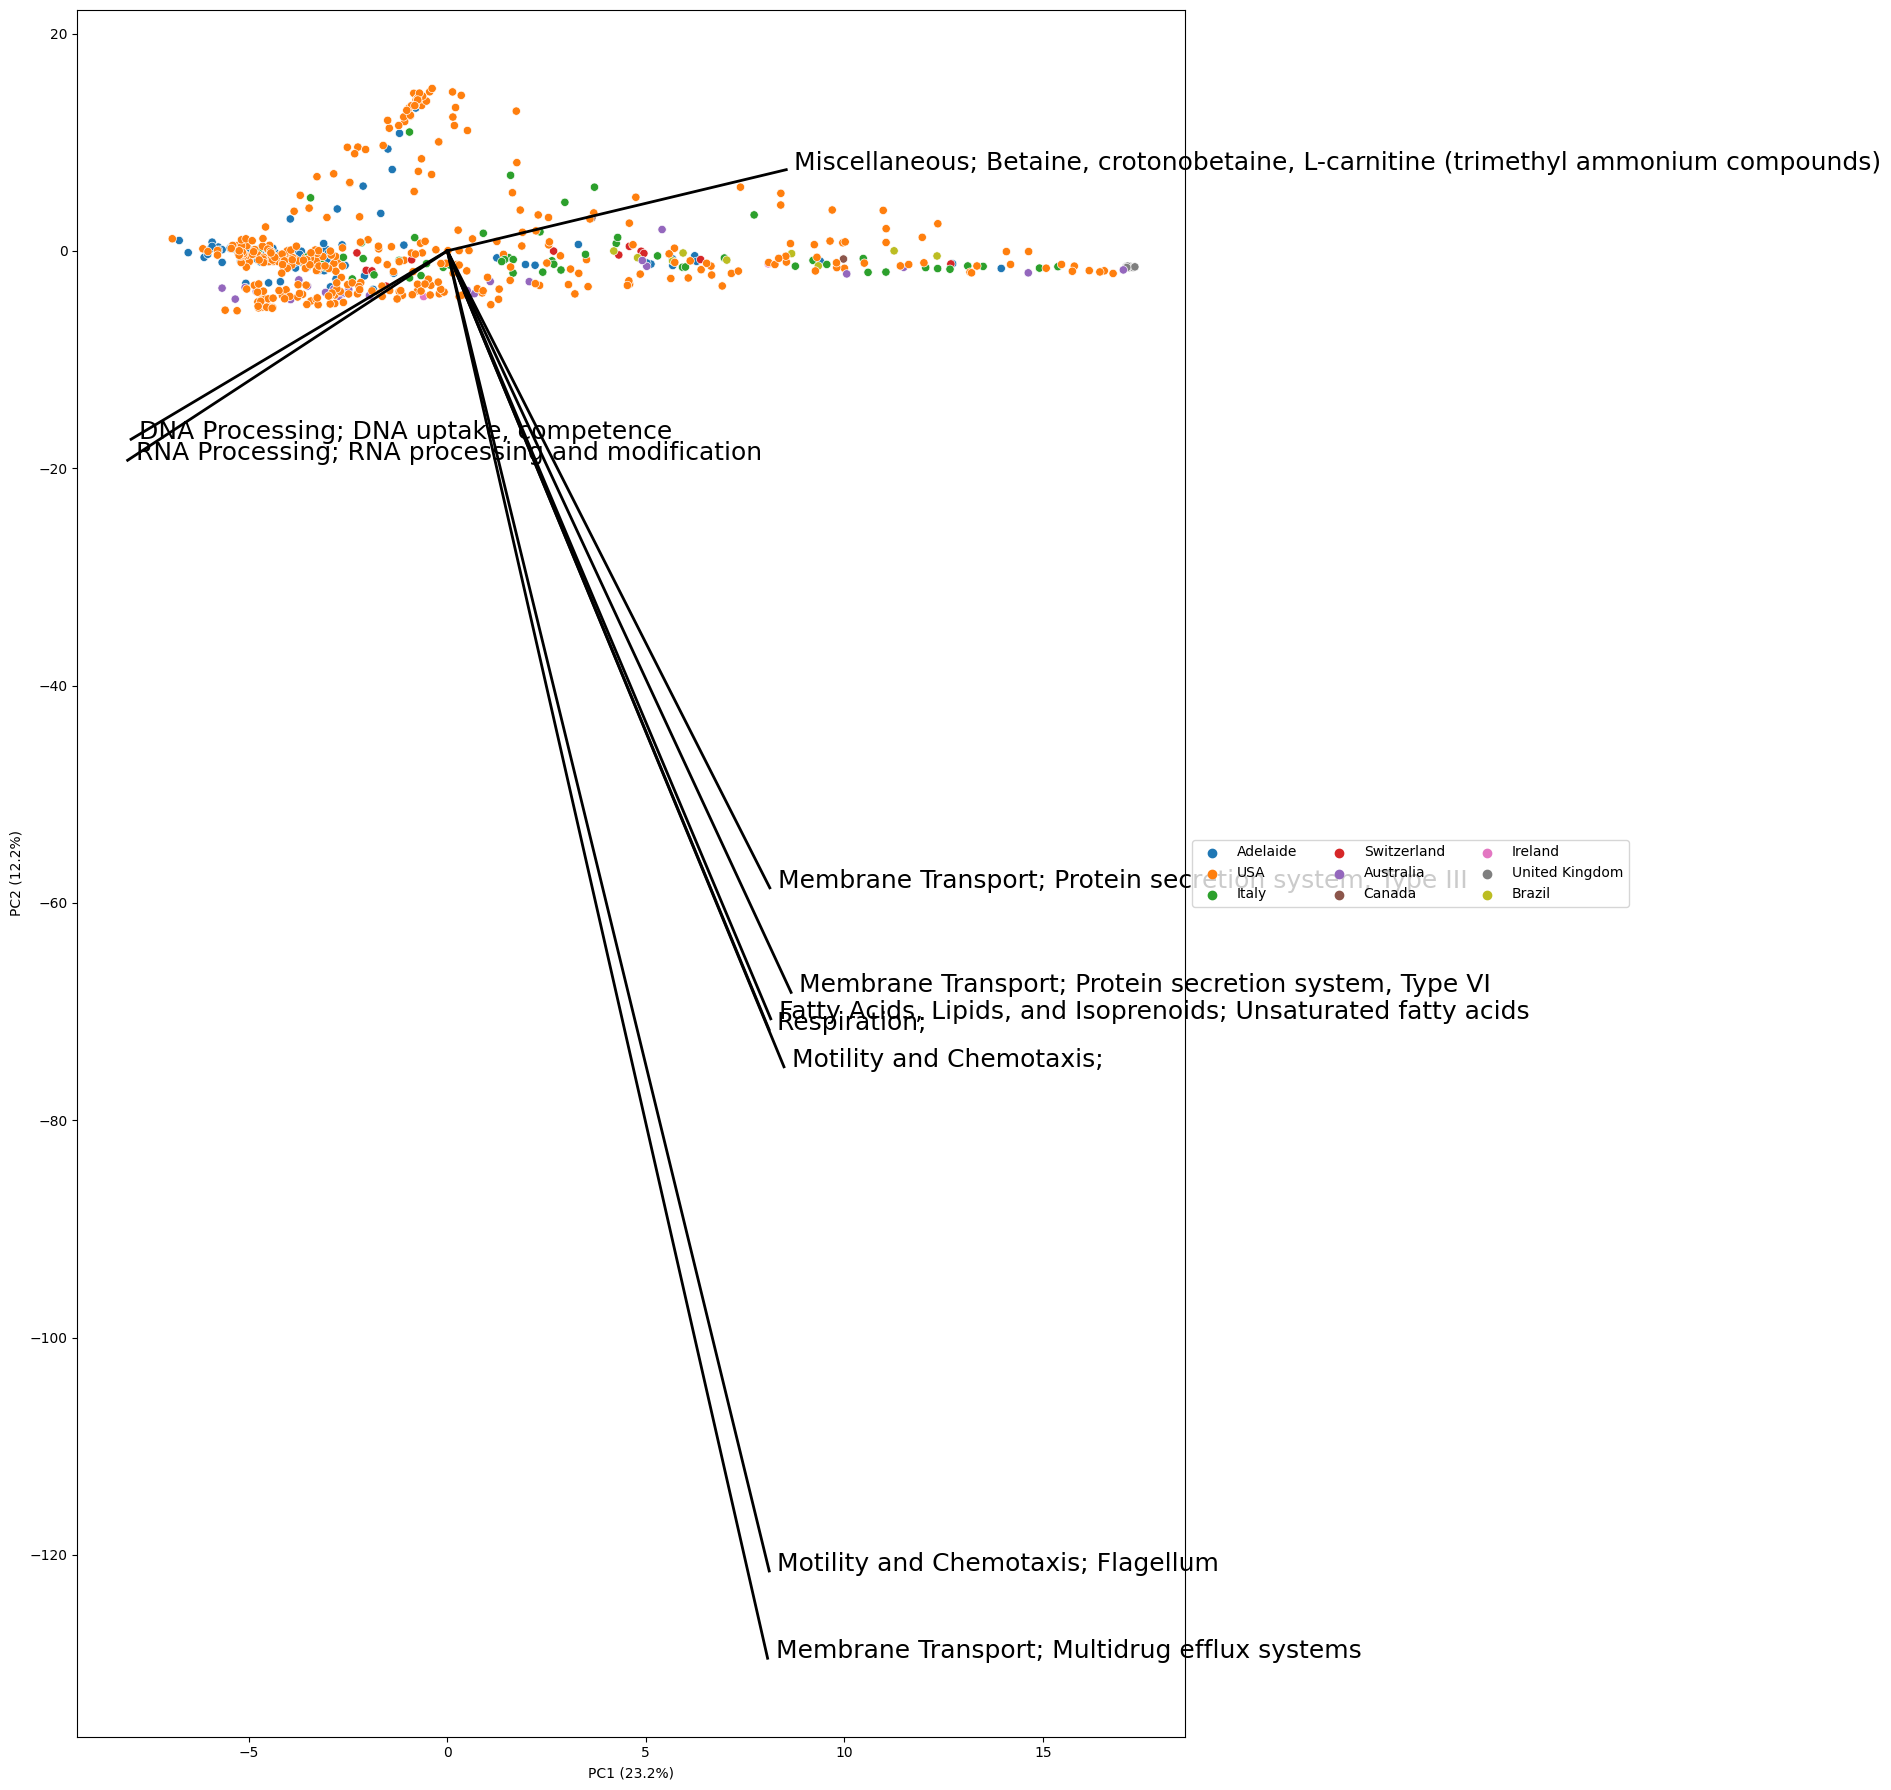

In [15]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.scatterplot(x="PC1", y="PC2", hue='Country', legend=True, data=pcloc, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
l = ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
l = ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
# get the 5 largest loadings
ldf = loadings.loc[loadings.abs().nlargest(10, ['PC1', 'PC2']).index]
# get the maximum values for x and y for the loadings and the PCA
mlx = max(ldf.PC1)
mly = max(ldf.PC2)
mpx = max(pct_df.PC1)
mpy = max(pct_df.PC2)

for i, l in ldf.iterrows():
    # scale the loadings to fit the figure
    ex = ( l.PC1 * (mpx/mlx) ) / 2
    ey = ( l.PC2 * (mpy/mly) ) / 2
    # add the text and the line
    plt.text(ex+0.2, ey, i, fontsize=18)
    plt.plot([0, ex ], [0, ey ], 'k-', lw=2)

plt.tight_layout()

# Taxonomy

We repeat the same analysis, but with genus taxonomy

### Read the Adelaide data

In [16]:
adl = pd.read_csv("C:\\Users\\edwa0468\\OneDrive - Flinders\\Projects\\CF\\Adelaide\\CF_Taxonomy\\genus.tsv", delimiter="\t")
adl = adl.rename(columns={"#NAME":"Accession"})
adl = adl.set_index("Accession")
adl = adl.reindex(natsorted(adl.columns), axis=1)
adl = adl.T
# normalise the data by the row sum before we add the label
adl = adl.div(adl.sum(axis=1), axis=0)
adl['geo_loc_name_country_calc'] = "Adelaide"
adl

Accession           g__Halothece  g__Dasypyrum   g__Geofilum  g__Triplophysa  \
623361_20180123_S            0.0           0.0  1.871224e-05             0.0   
634207_20180510_S            0.0           0.0  7.366511e-06             0.0   
634207_20180517_S            0.0           0.0  1.290154e-05             0.0   
639354_20171206_S            0.0           0.0  3.705914e-06             0.0   
642660_20180601_S            0.0           0.0  9.695324e-07             0.0   
...                          ...           ...           ...             ...   
1690154_20180406_S           0.0           0.0  4.824772e-06             0.0   
1723809_20180227_S           0.0           0.0  4.902915e-06             0.0   
1834617_20180501_S           0.0           0.0  5.850432e-06             0.0   
1845116_20180403_S           0.0           0.0  1.677878e-05             0.0   
1862551_20180123_S           0.0           0.0  5.179625e-05             0.0   

Accession           g__Luteirhabdus  g__Fonticella  g__Microvirgula  \
623361_20180123_S               0.0   0.000000e+00         0.000002   
634207_20180510_S               0.0   4.333242e-07         0.000005   
634207_20180517_S               0.0   0.000000e+00         0.000005   
639354_20171206_S               0.0   0.000000e+00         0.000000   
642660_20180601_S               0.0   0.000000e+00         0.000002   
...                             ...            ...              ...   
1690154_20180406_S              0.0   0.000000e+00         0.000006   
1723809_20180227_S              0.0   0.000000e+00         0.000002   
1834617_20180501_S              0.0   0.000000e+00         0.000007   
1845116_20180403_S              0.0   0.000000e+00         0.000000   
1862551_20180123_S              0.0   0.000000e+00         0.000000   

Accession           g__Rhodocytophaga  g__Allonocardiopsis  g__Desulforapulum  \
623361_20180123_S                 0.0         8.135756e-07           0.000000   
634207_20180510_S                 0.0         0.000000e+00           0.000003   
634207_20180517_S                 0.0         0.000000e+00           0.000000   
639354_20171206_S                 0.0         0.000000e+00           0.000015   
642660_20180601_S                 0.0         0.000000e+00           0.000002   
...                               ...                  ...                ...   
1690154_20180406_S                0.0         0.000000e+00           0.000000   
1723809_20180227_S                0.0         9.805830e-07           0.000001   
1834617_20180501_S                0.0         0.000000e+00           0.000001   
1845116_20180403_S                0.0         0.000000e+00           0.000002   
1862551_20180123_S                0.0         0.000000e+00           0.000000   

Accession           ...  g__Marivivens  g__Penicilliopsis  g__Rehaibacterium  \
623361_20180123_S   ...       0.000000                0.0                0.0   
634207_20180510_S   ...       0.000000                0.0                0.0   
634207_20180517_S   ...       0.000000                0.0                0.0   
639354_20171206_S   ...       0.000000                0.0                0.0   
642660_20180601_S   ...       0.000000                0.0                0.0   
...                 ...            ...                ...                ...   
1690154_20180406_S  ...       0.000000                0.0                0.0   
1723809_20180227_S  ...       0.000005                0.0                0.0   
1834617_20180501_S  ...       0.000000                0.0                0.0   
1845116_20180403_S  ...       0.000001                0.0                0.0   
1862551_20180123_S  ...       0.000013                0.0                0.0   

Accession           g__Halopiger  g__Budvicia  g__Biseptimavirus  \
623361_20180123_S            0.0     0.000006           0.000000   
634207_20180510_S            0.0     0.000000           0.000000   
634207_20180517_S            0.0     0.000000   

### Read the worldwide data

In [17]:
wlt = pd.read_csv("C:\\Users\\edwa0468\\OneDrive - Flinders\\Projects\\CF\\OtherSequences\\mmseqs_taxonomy\\genus.tsv", delimiter="\t")
wlt = wlt.rename(columns={"#NAME":"Accession"})
wlt = wlt.set_index('Accession')
wlt = wlt.reindex(natsorted(wlt.columns), axis=1)
wlt = wlt.T
# normalise the data by the row sum 
wlt = wlt.div(wlt.sum(axis=1), axis=0)
wlt

Accession      g__Morella  g__Neofusicoccum  g__Phoenicibacter  \
SRR1177122   0.000000e+00      0.000000e+00           0.000000   
SRR1180012   0.000000e+00      0.000000e+00           0.000000   
SRR1180013   0.000000e+00      0.000000e+00           0.000000   
SRR3284698   0.000000e+00      0.000000e+00           0.000000   
SRR3284701   0.000000e+00      0.000000e+00           0.000000   
...                   ...               ...                ...   
SRR24155132  0.000000e+00      0.000000e+00           0.000052   
SRR24155134  0.000000e+00      0.000000e+00           0.000079   
SRR24155135  1.268853e-07      0.000000e+00           0.000005   
SRR24155136  0.000000e+00      0.000000e+00           0.000002   
SRR24155138  0.000000e+00      1.719538e-07           0.000030   

Accession    g__Epsilonretrovirus  g__Suspvirus  g__Halopiger  g__Halosegnis  \
SRR1177122               0.000000  0.000000e+00      0.000000            0.0   
SRR1180012               0.000000  0.000000e+00      0.000000            0.0   
SRR1180013               0.000000  0.000000e+00      0.000000            0.0   
SRR3284698               0.000002  0.000000e+00      0.000000            0.0   
SRR3284701               0.000008  0.000000e+00      0.000000            0.0   
...                           ...           ...           ...            ...   
SRR24155132              0.000000  0.000000e+00      0.000000            0.0   
SRR24155134              0.000000  2.076798e-07      0.000000            0.0   
SRR24155135              0.000000  0.000000e+00      0.000000            0.0   
SRR24155136              0.000000  0.000000e+00      0.000000            0.0   
SRR24155138              0.000000  0.000000e+00      0.000001            0.0   

Accession    g__Lacerta    g__Dickeya  g__Exilisciurus  ...   g__Ruegeria  \
SRR1177122     0.000000  0.000000e+00              0.0  ...  0.000000e+00   
SRR1180012     0.000000  0.000000e+00              0.0  ...  0.000000e+00   
SRR1180013     0.000000  0.000000e+00              0.0  ...  0.000000e+00   
SRR3284698     0.000004  4.784334e-06              0.0  ...  0.000000e+00   
SRR3284701     0.000005  8.493132e-07              0.0  ...  8.493132e-07   
...                 ...           ...              ...  ...           ...   
SRR24155132    0.000000  1.484000e-05              0.0  ...  2.574285e-06   
SRR24155134    0.000000  1.526447e-05              0.0  ...  2.076798e-07   
SRR24155135    0.000000  1.268853e-07              0.0  ...  0.000000e+00   
SRR24155136    0.000000  1.105983e-05              0.0  ...  1.286027e-07   
SRR24155138    0.000000  9.285503e-06              0.0  ...  3.782983e-06   

Accession    g__Telluria  g__Votkovvirus     g__Python  g__Marinicella  \
SRR1177122           0.0    0.000000e+00  0.000000e+00    0.000000e+00   
SRR1180012           0.0    0.000000e+00  0.000000e+00    0.000000e+00   
SRR1180013           0.0    0.000000e+00  0.000000e+00    0.000000e+00   
SRR3284698           0.0    0.000000e+00  1.594778e-05    0.000000e+00   
SRR3284701           0.0    0.000000e+00  1.104107e-05    8.493132e-07   
...                  ...             ...           ...             ...   
SRR24155132          0.0    0.000000e+00  0.000000e+00    9.085712e-07   
SRR24155134          0.0    2.076798e-07  1.038399e-07    0.000000e+00   
SRR24155135          0.0    0.000000e+00  0.000000e+00    0.000000e+00   
SRR24155136          0.0    0.000000e+00  0.000000e+00    0.000000e+00   
SRR24155138          0.0    0.000000e+00  0.000000e+00    1.719538e-07   

Accession    g__Trifolium  g__Candidatus Ichthyocystis  g__Balaeniceps  \
SRR1177122   8.719047e-05                          0.0    0.000000e+00   
SRR1180012   3.929852e-05                          0.0    0.000000e+00   
SRR1180013   1.091203e-04                          0.0    0.000000e+00   
SRR3284698   4.624856e-04                          0.0    7.973890e-07   
SRR3284701   5.146838e-04                          0.0    0.00

In [18]:
six = pd.read_csv("C:\\Users\\edwa0468\\OneDrive - Flinders\\Projects\\CF\\OtherSequences\\16S.tsv", delimiter="\t")
sr = six[six["Aligned 1 time"] > 1]
wlt = wlt[~wlt.index.isin(sr['Run'])]
wlt

Accession      g__Morella  g__Neofusicoccum  g__Phoenicibacter  \
SRR1177122   0.000000e+00      0.000000e+00           0.000000   
SRR1180012   0.000000e+00      0.000000e+00           0.000000   
SRR1180013   0.000000e+00      0.000000e+00           0.000000   
SRR3284698   0.000000e+00      0.000000e+00           0.000000   
SRR3284701   0.000000e+00      0.000000e+00           0.000000   
...                   ...               ...                ...   
SRR24155132  0.000000e+00      0.000000e+00           0.000052   
SRR24155134  0.000000e+00      0.000000e+00           0.000079   
SRR24155135  1.268853e-07      0.000000e+00           0.000005   
SRR24155136  0.000000e+00      0.000000e+00           0.000002   
SRR24155138  0.000000e+00      1.719538e-07           0.000030   

Accession    g__Epsilonretrovirus  g__Suspvirus  g__Halopiger  g__Halosegnis  \
SRR1177122               0.000000  0.000000e+00      0.000000            0.0   
SRR1180012               0.000000  0.000000e+00      0.000000            0.0   
SRR1180013               0.000000  0.000000e+00      0.000000            0.0   
SRR3284698               0.000002  0.000000e+00      0.000000            0.0   
SRR3284701               0.000008  0.000000e+00      0.000000            0.0   
...                           ...           ...           ...            ...   
SRR24155132              0.000000  0.000000e+00      0.000000            0.0   
SRR24155134              0.000000  2.076798e-07      0.000000            0.0   
SRR24155135              0.000000  0.000000e+00      0.000000            0.0   
SRR24155136              0.000000  0.000000e+00      0.000000            0.0   
SRR24155138              0.000000  0.000000e+00      0.000001            0.0   

Accession    g__Lacerta    g__Dickeya  g__Exilisciurus  ...   g__Ruegeria  \
SRR1177122     0.000000  0.000000e+00              0.0  ...  0.000000e+00   
SRR1180012     0.000000  0.000000e+00              0.0  ...  0.000000e+00   
SRR1180013     0.000000  0.000000e+00              0.0  ...  0.000000e+00   
SRR3284698     0.000004  4.784334e-06              0.0  ...  0.000000e+00   
SRR3284701     0.000005  8.493132e-07              0.0  ...  8.493132e-07   
...                 ...           ...              ...  ...           ...   
SRR24155132    0.000000  1.484000e-05              0.0  ...  2.574285e-06   
SRR24155134    0.000000  1.526447e-05              0.0  ...  2.076798e-07   
SRR24155135    0.000000  1.268853e-07              0.0  ...  0.000000e+00   
SRR24155136    0.000000  1.105983e-05              0.0  ...  1.286027e-07   
SRR24155138    0.000000  9.285503e-06              0.0  ...  3.782983e-06   

Accession    g__Telluria  g__Votkovvirus     g__Python  g__Marinicella  \
SRR1177122           0.0    0.000000e+00  0.000000e+00    0.000000e+00   
SRR1180012           0.0    0.000000e+00  0.000000e+00    0.000000e+00   
SRR1180013           0.0    0.000000e+00  0.000000e+00    0.000000e+00   
SRR3284698           0.0    0.000000e+00  1.594778e-05    0.000000e+00   
SRR3284701           0.0    0.000000e+00  1.104107e-05    8.493132e-07   
...                  ...             ...           ...             ...   
SRR24155132          0.0    0.000000e+00  0.000000e+00    9.085712e-07   
SRR24155134          0.0    2.076798e-07  1.038399e-07    0.000000e+00   
SRR24155135          0.0    0.000000e+00  0.000000e+00    0.000000e+00   
SRR24155136          0.0    0.000000e+00  0.000000e+00    0.000000e+00   
SRR24155138          0.0    0.000000e+00  0.000000e+00    1.719538e-07   

Accession    g__Trifolium  g__Candidatus Ichthyocystis  g__Balaeniceps  \
SRR1177122   8.719047e-05                          0.0    0.000000e+00   
SRR1180012   3.929852e-05                          0.0    0.000000e+00   
SRR1180013   1.091203e-04                          0.0    0.000000e+00   
SRR3284698   4.624856e-04                          0.0    7.973890e-07   
SRR3284701   5.146838e-04                          0.0    0.00

## Add the metadata

In [19]:
wmd = pd.read_csv("C:\\Users\\edwa0468\\OneDrive - Flinders\\Projects\\CF\\OtherSequences\\bq-results-20230813-093918-1691921491006.tsv", delimiter="\t")
wma = wmd[['Accession', 'geo_loc_name_country_calc']]
wma = wma.set_index("Accession")
wldj = wlt.join(wma,  how='inner')
comb = pd.concat([adl, wldj], axis=0)
comb

g__Halothece  g__Dasypyrum   g__Geofilum  g__Triplophysa  \
623361_20180123_S           0.0           0.0  1.871224e-05             0.0   
634207_20180510_S           0.0           0.0  7.366511e-06             0.0   
634207_20180517_S           0.0           0.0  1.290154e-05             0.0   
639354_20171206_S           0.0           0.0  3.705914e-06             0.0   
642660_20180601_S           0.0           0.0  9.695324e-07             0.0   
...                         ...           ...           ...             ...   
SRR24155132                 0.0           0.0  1.041828e-04             0.0   
SRR24155134                 0.0           0.0  0.000000e+00             0.0   
SRR24155135                 0.0           0.0  6.344266e-08             0.0   
SRR24155136                 0.0           0.0  0.000000e+00             0.0   
SRR24155138                 0.0           0.0  2.751260e-06             0.0   

                   g__Luteirhabdus  g__Fonticella  g__Microvirgula  \
623361_20180123_S              0.0   0.000000e+00     1.627151e-06   
634207_20180510_S              0.0   4.333242e-07     5.199890e-06   
634207_20180517_S              0.0   0.000000e+00     5.312399e-06   
639354_20171206_S              0.0   0.000000e+00     0.000000e+00   
642660_20180601_S              0.0   0.000000e+00     1.939065e-06   
...                            ...            ...              ...   
SRR24155132                    0.0   4.542856e-07     0.000000e+00   
SRR24155134                    0.0   9.034073e-06     9.864792e-06   
SRR24155135                    0.0   6.344266e-08     8.247546e-07   
SRR24155136                    0.0   2.572054e-07     3.858081e-07   
SRR24155138                    0.0   6.878150e-07     5.158613e-07   

                   g__Rhodocytophaga  g__Allonocardiopsis  g__Desulforapulum  \
623361_20180123_S       0.000000e+00         8.135756e-07       0.000000e+00   
634207_20180510_S       0.000000e+00         0.000000e+00       2.599945e-06   
634207_20180517_S       0.000000e+00         0.000000e+00       0.000000e+00   
639354_20171206_S       0.000000e+00         0.000000e+00       1.482365e-05   
642660_20180601_S       0.000000e+00         0.000000e+00       1.939065e-06   
...                              ...                  ...                ...   
SRR24155132             3.028571e-07         0.000000e+00       1.060000e-06   
SRR24155134             0.000000e+00         0.000000e+00       5.191996e-07   
SRR24155135             0.000000e+00         0.000000e+00       0.000000e+00   
SRR24155136             0.000000e+00         0.000000e+00       0.000000e+00   
SRR24155138             0.000000e+00         0.000000e+00       0.000000e+00   

                   ...  g__Esteya  g__Sripuvirus  g__Scapholeberis  \
623361_20180123_S  ...        NaN            NaN               NaN   
634207_20180510_S  ...        NaN            NaN               NaN   
634207_20180517_S  ...        NaN            NaN               NaN   
639354_20171206_S  ...        NaN            NaN               NaN   
642660_20180601_S  ...        NaN            NaN               NaN   
...                ...        ...            ...               ...   
SRR24155132        ...        0.0            0.0               0.0   
SRR24155134        ...        0.0            0.0               0.0   
SRR24155135        ...        0.0            0.0               0.0   
SRR24155136        ...        0.0            0.0               0.0   
SRR24155138        ...        0.0            0.0               0.0   

                   g__Hippolais  g__Sphaerimonospora  g__Telluria  \
623361_20180123_S           NaN                  NaN          NaN   
634207_20180510_S           NaN                  NaN          NaN   
634207_20180517_S           NaN                  NaN          NaN   
639354_20171206_S           NaN                  NaN          NaN   
642660_20180601_S           NaN                  NaN          NaN   
...          

## Reset the metadata

In [20]:
locs = comb[['geo_loc_name_country_calc']]
locs = locs.rename(columns={"geo_loc_name_country_calc": "Country"})
df = comb.drop(['geo_loc_name_country_calc'], axis=1)
df = df.dropna(axis=1)
df

g__Halothece  g__Dasypyrum   g__Geofilum  g__Triplophysa  \
623361_20180123_S           0.0           0.0  1.871224e-05             0.0   
634207_20180510_S           0.0           0.0  7.366511e-06             0.0   
634207_20180517_S           0.0           0.0  1.290154e-05             0.0   
639354_20171206_S           0.0           0.0  3.705914e-06             0.0   
642660_20180601_S           0.0           0.0  9.695324e-07             0.0   
...                         ...           ...           ...             ...   
SRR24155132                 0.0           0.0  1.041828e-04             0.0   
SRR24155134                 0.0           0.0  0.000000e+00             0.0   
SRR24155135                 0.0           0.0  6.344266e-08             0.0   
SRR24155136                 0.0           0.0  0.000000e+00             0.0   
SRR24155138                 0.0           0.0  2.751260e-06             0.0   

                   g__Luteirhabdus  g__Fonticella  g__Microvirgula  \
623361_20180123_S              0.0   0.000000e+00     1.627151e-06   
634207_20180510_S              0.0   4.333242e-07     5.199890e-06   
634207_20180517_S              0.0   0.000000e+00     5.312399e-06   
639354_20171206_S              0.0   0.000000e+00     0.000000e+00   
642660_20180601_S              0.0   0.000000e+00     1.939065e-06   
...                            ...            ...              ...   
SRR24155132                    0.0   4.542856e-07     0.000000e+00   
SRR24155134                    0.0   9.034073e-06     9.864792e-06   
SRR24155135                    0.0   6.344266e-08     8.247546e-07   
SRR24155136                    0.0   2.572054e-07     3.858081e-07   
SRR24155138                    0.0   6.878150e-07     5.158613e-07   

                   g__Rhodocytophaga  g__Allonocardiopsis  g__Desulforapulum  \
623361_20180123_S       0.000000e+00         8.135756e-07       0.000000e+00   
634207_20180510_S       0.000000e+00         0.000000e+00       2.599945e-06   
634207_20180517_S       0.000000e+00         0.000000e+00       0.000000e+00   
639354_20171206_S       0.000000e+00         0.000000e+00       1.482365e-05   
642660_20180601_S       0.000000e+00         0.000000e+00       1.939065e-06   
...                              ...                  ...                ...   
SRR24155132             3.028571e-07         0.000000e+00       1.060000e-06   
SRR24155134             0.000000e+00         0.000000e+00       5.191996e-07   
SRR24155135             0.000000e+00         0.000000e+00       0.000000e+00   
SRR24155136             0.000000e+00         0.000000e+00       0.000000e+00   
SRR24155138             0.000000e+00         0.000000e+00       0.000000e+00   

                   ...  g__Mangrovicoccus  g__Marivivens  g__Penicilliopsis  \
623361_20180123_S  ...       0.000000e+00            0.0       0.000000e+00   
634207_20180510_S  ...       8.666484e-07            0.0       0.000000e+00   
634207_20180517_S  ...       7.589142e-07            0.0       0.000000e+00   
639354_20171206_S  ...       0.000000e+00            0.0       0.000000e+00   
642660_20180601_S  ...       0.000000e+00            0.0       0.000000e+00   
...                ...                ...            ...                ...   
SRR24155132        ...       3.028571e-07            0.0       0.000000e+00   
SRR24155134        ...       0.000000e+00            0.0       1.038399e-07   
SRR24155135        ...       0.000000e+00            0.0       6.344266e-08   
SRR24155136        ...       0.000000e+00            0.0       0.000000e+00   
SRR24155138        ...       0.000000e+00            0.0       0.000000e+00   

                   g__Rehaibacterium  g__Halopiger   g__Budvicia  \
623361_20180123_S                0.0      0.000000  5.695030e-06   
634207_20180510_S                0.0      0.000000  0.000000e+00   
634207_20180517_S                0.0      0.000000  0.000000e+00   
639354_20171206_S                0.0      0.000

## Start the PCA

In [21]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
pca = PCA(n_components=4)
pca.fit(df_scaled)
dft_pca = pca.transform(df_scaled)
zipped = list(zip(dft_pca[:,0],
                  dft_pca[:,1],
                  dft_pca[:,2],
                  dft_pca[:,3],
                  list(df.index),
                 ))
pct_df = pd.DataFrame(zipped, columns=['PC1', 'PC2', 'PC3', 'PC4', "Accession"])
pcloc = pct_df.set_index("Accession").join(locs, how="inner")
pcloc = pcloc[pcloc['Country'] != 'uncalculated']
pcloc

PC1        PC2       PC3       PC4   Country
623361_20180123_S  -4.623458  -5.848419 -2.407921 -2.869173  Adelaide
634207_20180510_S  -8.594298   8.665952 -2.384729 -1.745727  Adelaide
634207_20180517_S  -5.895847  -1.545807 -2.876722 -3.839346  Adelaide
639354_20171206_S  -3.490867  -6.825710 -0.155361 -2.798445  Adelaide
642660_20180601_S  -1.816609  -7.020721 -5.931422 -2.022600  Adelaide
...                      ...        ...       ...       ...       ...
SRR24155132       -12.104858  19.980040 -0.420471 -0.977258       USA
SRR24155134       -10.797613  14.883105 -3.368471 -1.951756       USA
SRR24155135        -2.891195  -5.331952 -6.084931 -3.789110       USA
SRR24155136        -6.000702   2.319826 -4.321375 -3.760811       USA
SRR24155138       -10.137953  15.099894 -3.623936 -3.259059       USA

[611 rows x 5 columns]

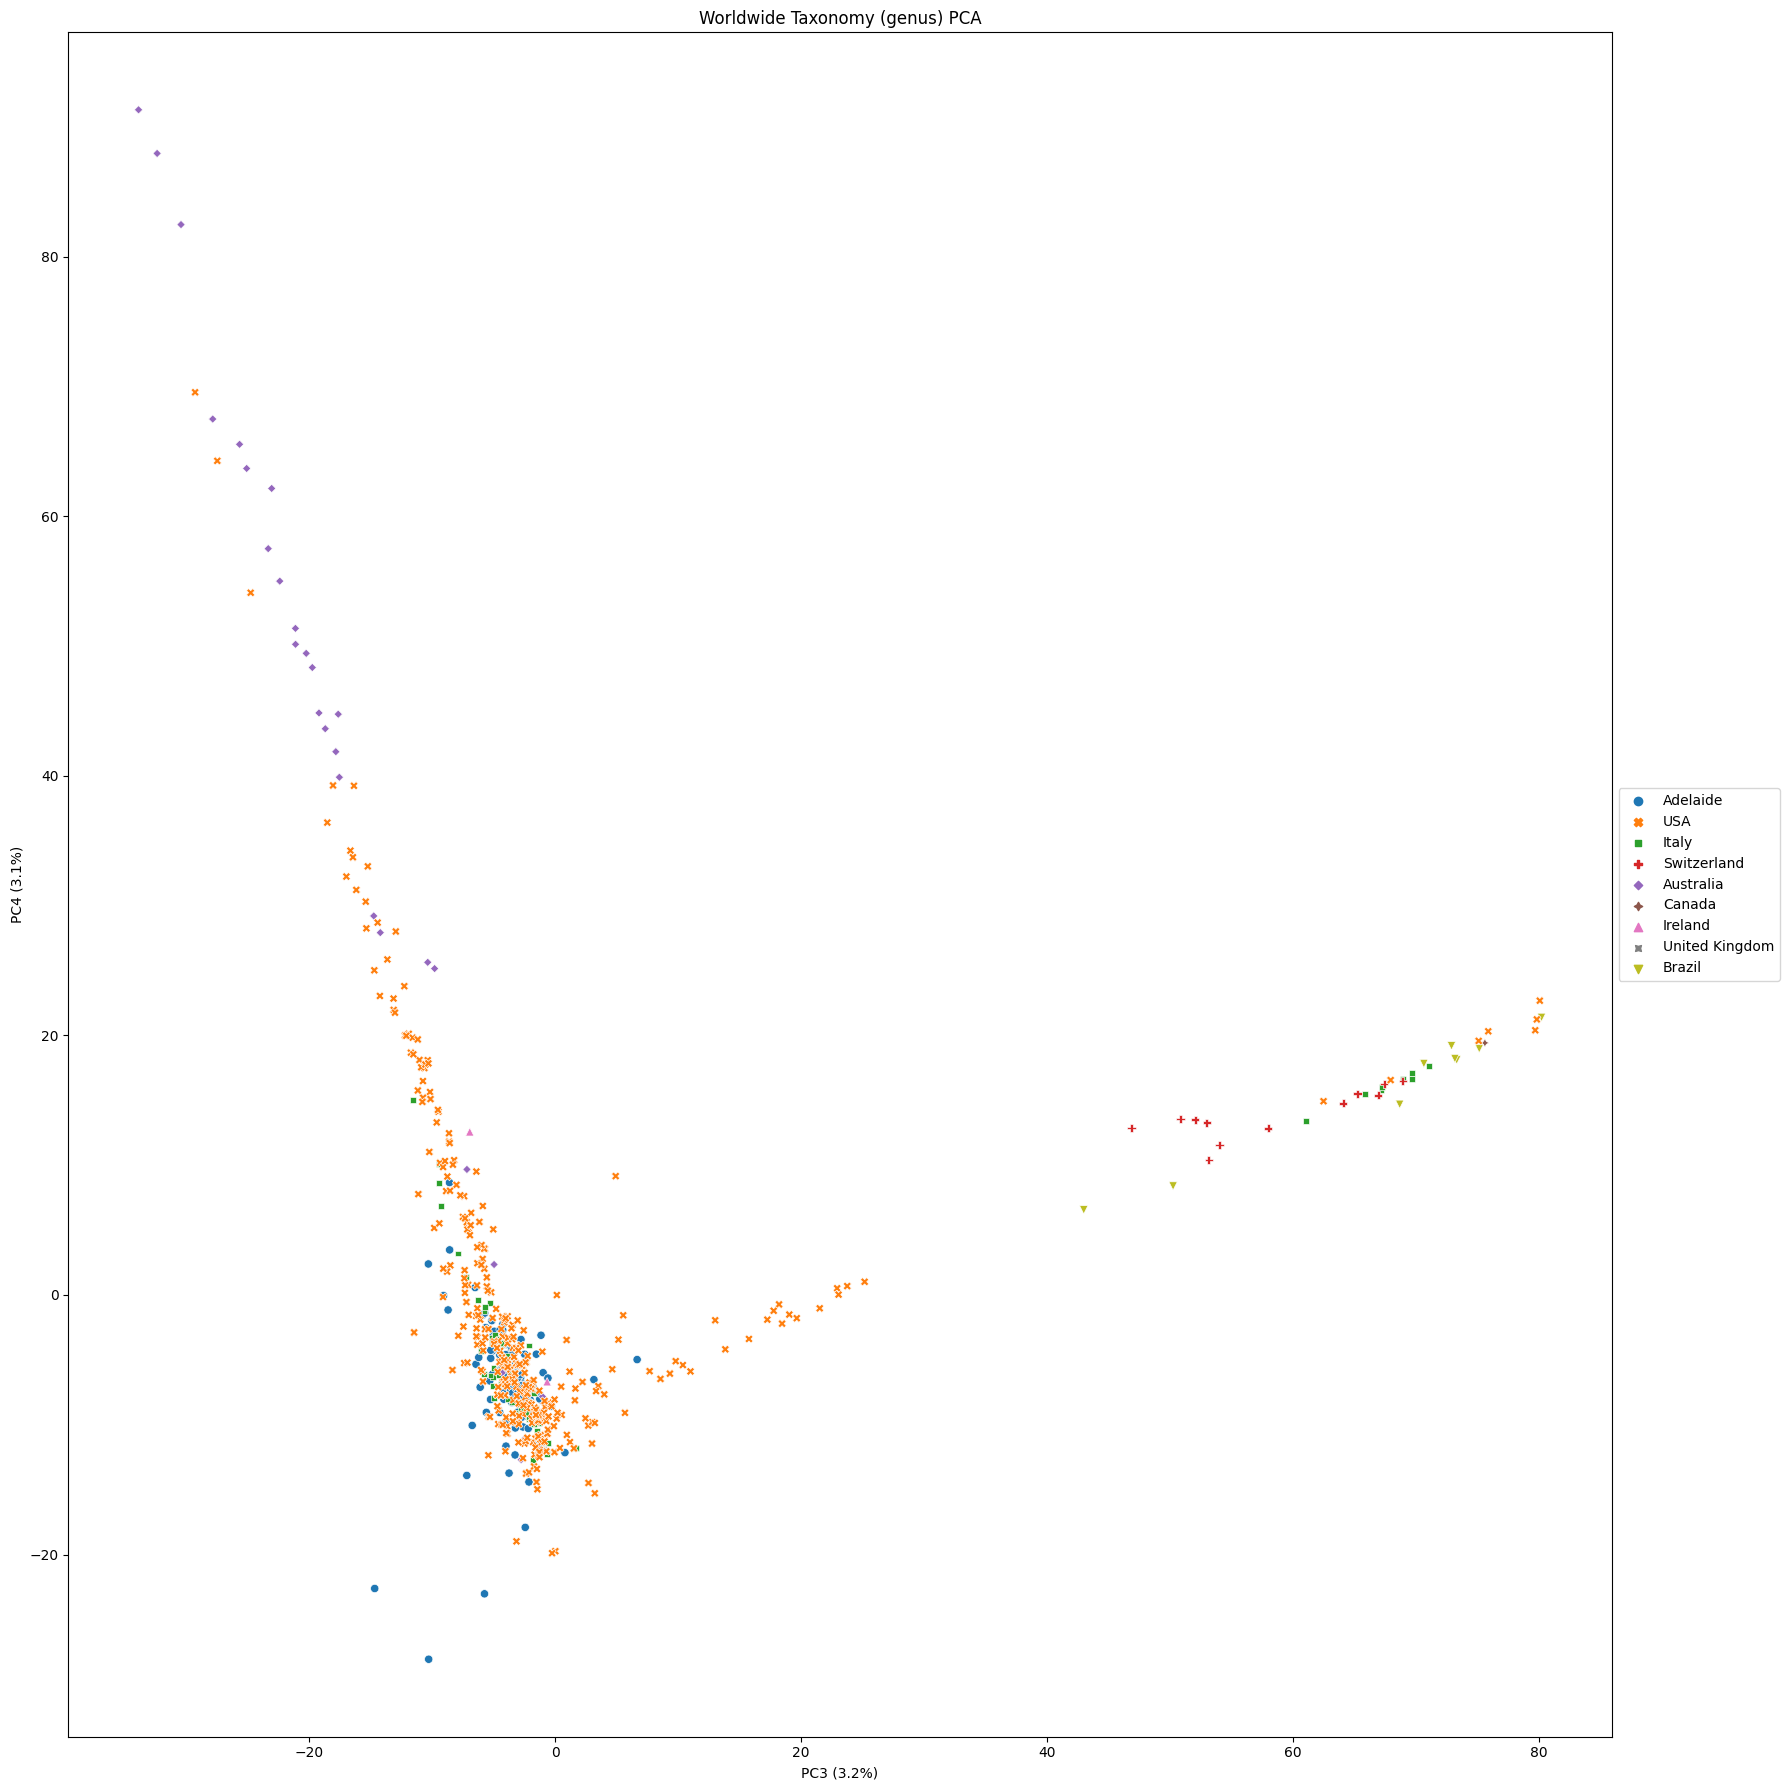

In [22]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.scatterplot(x="PC1", y="PC2", hue='Country', style='Country', legend=True, data=pcloc, ax=ax)
l = ax.set_xlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)")
l = ax.set_ylabel(f"PC4 ({pca.explained_variance_ratio_[3]*100:.1f}%)")
t = ax.set_title(f"Worldwide Taxonomy (genus) PCA")
ax.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()


In [23]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=df.columns)
loadings.head(3)

PC1       PC2       PC3       PC4
g__Halothece  0.001022 -0.001120 -0.000364 -0.000669
g__Dasypyrum -0.000185 -0.000655  0.002091 -0.000277
g__Geofilum  -0.012826  0.027155  0.004219  0.011743

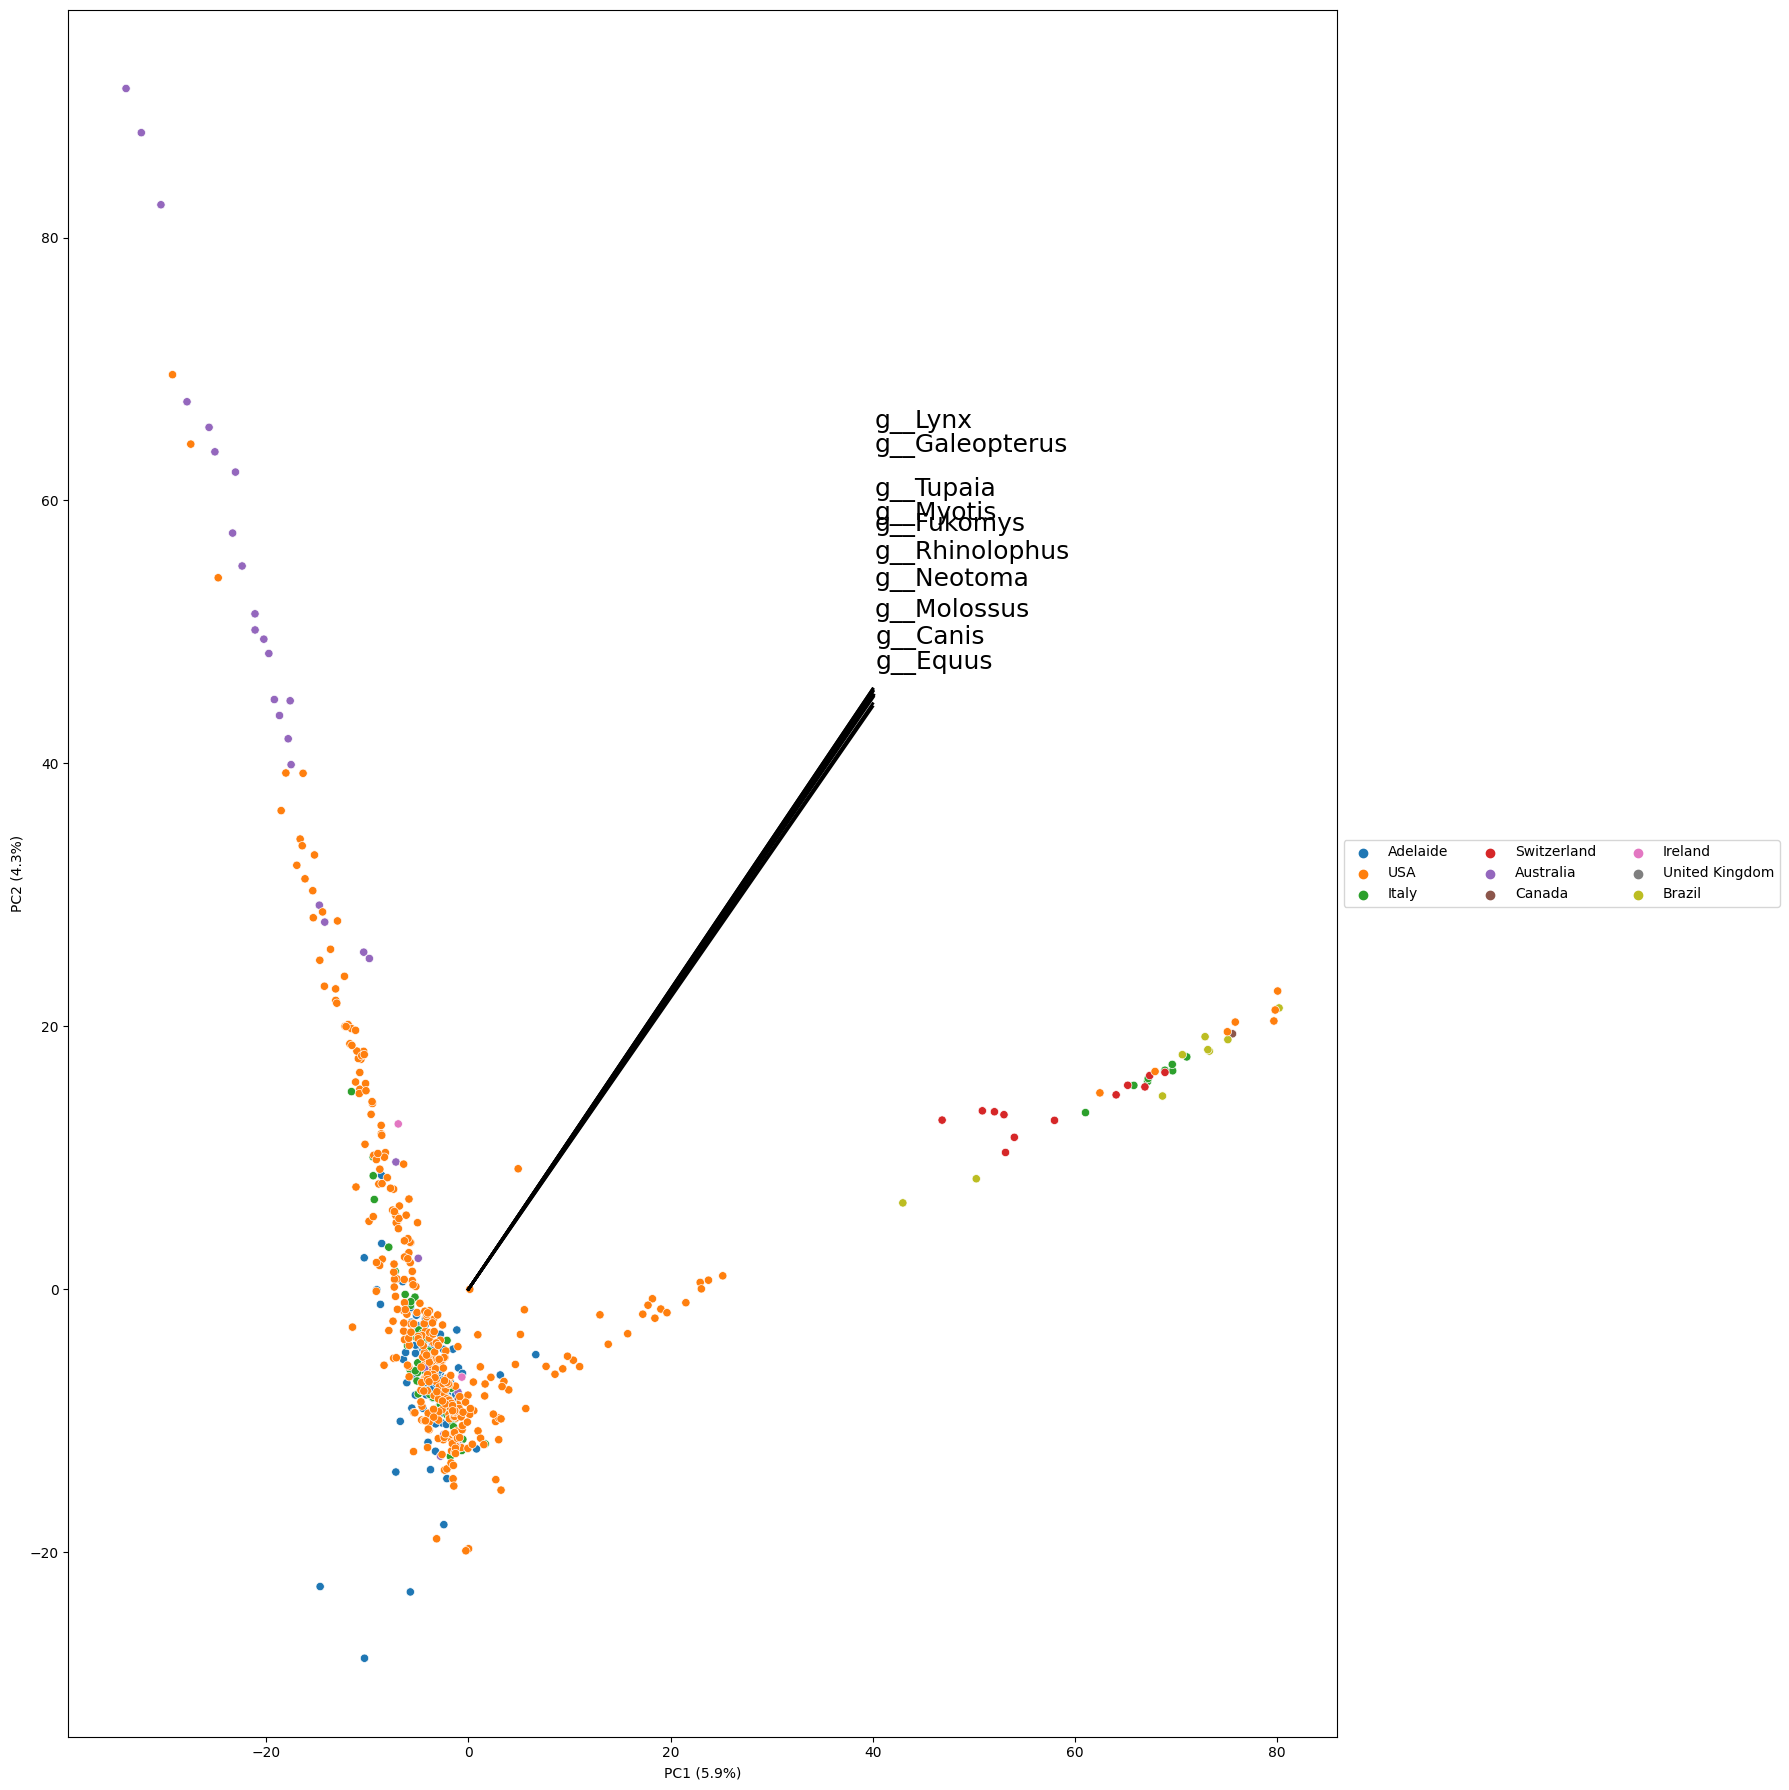

In [24]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.scatterplot(x="PC1", y="PC2", hue='Country', legend=True, data=pcloc, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
l = ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
l = ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
# get the 5 largest loadings
ldf = loadings.loc[loadings.abs().nlargest(10, ['PC1', 'PC2']).index]
# get the maximum values for x and y for the loadings and the PCA
mlx = max(ldf.PC1)
mly = max(ldf.PC2)
mpx = max(pct_df.PC1)
mpy = max(pct_df.PC2)

c = 0
for i, l in ldf.iterrows():
    c+=2
    # scale the loadings to fit the figure
    ex = ( l.PC1 * (mpx/mlx) ) / 2
    ey = ( l.PC2 * (mpy/mly) ) / 2
    # add the text and the line
    plt.text(ex+0.2, ey+c, i, fontsize=18)
    plt.plot([0, ex ], [0, ey ], 'k-', lw=2)

plt.tight_layout()
fig.savefig("Worldwide_taxonomy_genus.png")

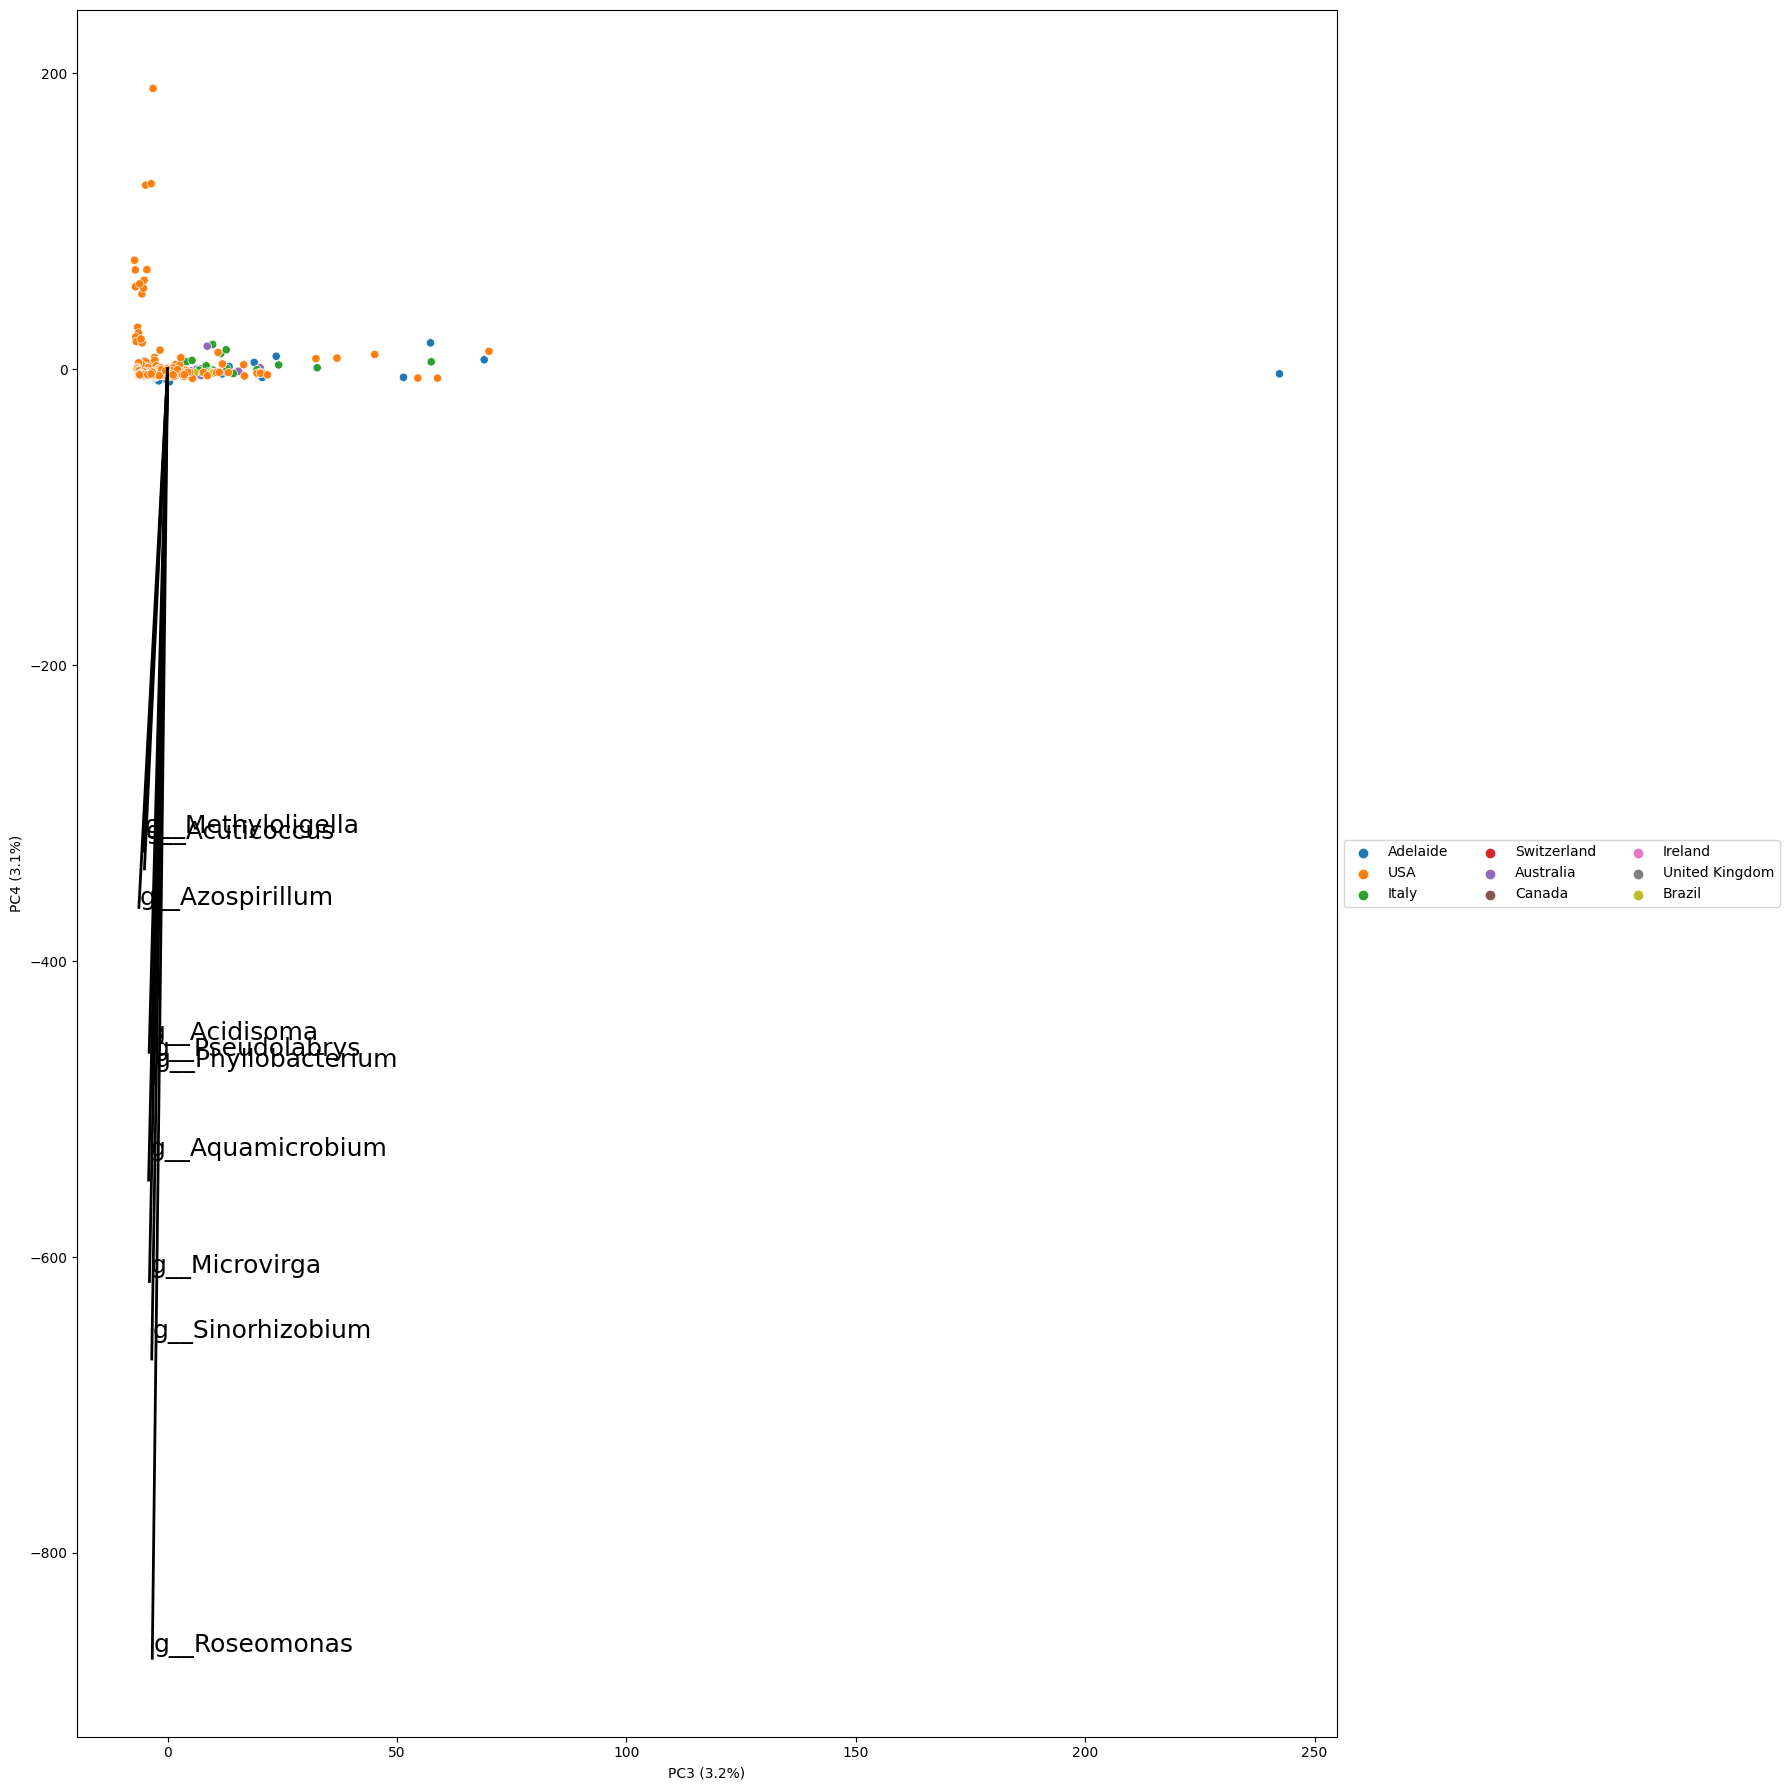

In [25]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.scatterplot(x="PC3", y="PC4", hue='Country', legend=True, data=pcloc, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
l = ax.set_xlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)")
l = ax.set_ylabel(f"PC4 ({pca.explained_variance_ratio_[3]*100:.1f}%)")
# get the 5 largest loadings
ldf = loadings.loc[loadings.abs().nlargest(10, ['PC3', 'PC4']).index]
# get the maximum values for x and y for the loadings and the PCA
mlx = max(ldf.PC3)
mly = max(ldf.PC4)
mpx = max(pct_df.PC3)
mpy = max(pct_df.PC4)

c = 0
for i, l in ldf.iterrows():
    c+=2
    # scale the loadings to fit the figure
    ex = ( l.PC1 * (mpx/mlx) ) / 2
    ey = ( l.PC2 * (mpy/mly) ) / 2
    # add the text and the line
    plt.text(ex+0.2, ey+c, i, fontsize=18)
    plt.plot([0, ex ], [0, ey ], 'k-', lw=2)

plt.tight_layout()

## Remove the eukaryotes from the data

Some of the samples have matches to eukaryotes, and so we're just going to remove them all. This means we need a table of all the taxonomy (`all_taxa.tsv`) and then we can filter just for the Bacteria/Viruses

In [26]:
taxon = pd.read_csv("C:\\Users\\edwa0468\\OneDrive - Flinders\\Projects\\CF\\OtherSequences\\all_taxa.tsv", delimiter="\t")
taxon[taxon['Superkingdom'] == 's__Eukaryota']['Genus']

106809         g__Cafeteria
106810         g__Cafeteria
106811      g__Blastocystis
106812      g__Blastocystis
106813      g__Blastocystis
                ...        
112426         g__Coemansia
112427         g__Linderina
112428     g__Piptocephalis
112429       g__Syncephalis
112430    g__Thamnocephalis
Name: Genus, Length: 5622, dtype: object

### Read the Adelaide data without the Eukaryotes

In [27]:
adl = pd.read_csv("C:\\Users\\edwa0468\\OneDrive - Flinders\\Projects\\CF\\Adelaide\\CF_Taxonomy\\genus.tsv", delimiter="\t")
adl = adl.rename(columns={"#NAME":"Accession"})
adl = adl.set_index("Accession")
adl = adl[~adl.index.isin(taxon[taxon['Superkingdom'] == 's__Eukaryota']['Genus'])]
adl = adl.reindex(natsorted(adl.columns), axis=1)
adl = adl.T
# normalise the data by the row sum before we add the label
adl = adl.div(adl.sum(axis=1), axis=0)
adl['geo_loc_name_country_calc'] = "Adelaide"
adl

Accession           g__Halothece   g__Geofilum  g__Luteirhabdus  \
623361_20180123_S            0.0  1.880829e-05              0.0   
634207_20180510_S            0.0  7.398355e-06              0.0   
634207_20180517_S            0.0  1.295082e-05              0.0   
639354_20171206_S            0.0  3.767159e-06              0.0   
642660_20180601_S            0.0  9.752568e-07              0.0   
...                          ...           ...              ...   
1690154_20180406_S           0.0  4.845012e-06              0.0   
1723809_20180227_S           0.0  4.937635e-06              0.0   
1834617_20180501_S           0.0  5.875234e-06              0.0   
1845116_20180403_S           0.0  1.688673e-05              0.0   
1862551_20180123_S           0.0  5.224319e-05              0.0   

Accession           g__Fonticella  g__Microvirgula  g__Rhodocytophaga  \
623361_20180123_S    0.000000e+00         0.000002                0.0   
634207_20180510_S    4.351974e-07         0.000005                0.0   
634207_20180517_S    0.000000e+00         0.000005                0.0   
639354_20171206_S    0.000000e+00         0.000000                0.0   
642660_20180601_S    0.000000e+00         0.000002                0.0   
...                           ...              ...                ...   
1690154_20180406_S   0.000000e+00         0.000006                0.0   
1723809_20180227_S   0.000000e+00         0.000002                0.0   
1834617_20180501_S   0.000000e+00         0.000007                0.0   
1845116_20180403_S   0.000000e+00         0.000000                0.0   
1862551_20180123_S   0.000000e+00         0.000000                0.0   

Accession           g__Allonocardiopsis  g__Desulforapulum  g__Gottfriedia  \
623361_20180123_S          8.177518e-07           0.000000        0.000017   
634207_20180510_S          0.000000e+00           0.000003        0.000002   
634207_20180517_S          0.000000e+00           0.000000        0.000000   
639354_20171206_S          0.000000e+00           0.000015        0.000011   
642660_20180601_S          0.000000e+00           0.000002        0.000000   
...                                 ...                ...             ...   
1690154_20180406_S         0.000000e+00           0.000000        0.000003   
1723809_20180227_S         9.875270e-07           0.000001        0.000036   
1834617_20180501_S         0.000000e+00           0.000001        0.000024   
1845116_20180403_S         0.000000e+00           0.000002        0.000055   
1862551_20180123_S         0.000000e+00           0.000000        0.000000   

Accession           g__Colidextribacter  ...  g__Candidatus Sulfidibacterium  \
623361_20180123_S          1.144852e-05  ...                             0.0   
634207_20180510_S          1.144569e-04  ...                             0.0   
634207_20180517_S          7.618131e-06  ...                             0.0   
639354_20171206_S          0.000000e+00  ...                             0.0   
642660_20180601_S          1.950514e-06  ...                             0.0   
...                                 ...  ...                             ...   
1690154_20180406_S         0.000000e+00  ...                             0.0   
1723809_20180227_S         9.875270e-07  ...                             0.0   
1834617_20180501_S         1.305607e-06  ...                             0.0   
1845116_20180403_S         3.476680e-06  ...                             0.0   
1862551_20180123_S         0.000000e+00  ...                             0.0   

Accession           g__Mangrovicoccus  g__Marivivens  g__Rehaibacterium  \
623361_20180123_S        0.000000e+00       0.000000                0.0   
634207_20180510_S        8.703947e-07       0.000000                0.0   
634207_20180517_S        7.618131e-07       0.000000                0.0   
639354_20171206_S        0.000000e+00       0.000000                0.0   
642660_20180601_S        0.000000e+00       0

### Read the Worldwide data without the Eukaryotes

In [28]:
wlt = pd.read_csv("C:\\Users\\edwa0468\\OneDrive - Flinders\\Projects\\CF\\OtherSequences\\mmseqs_taxonomy\\genus.tsv", delimiter="\t")
wlt = wlt.rename(columns={"#NAME":"Accession"})
wlt = wlt.set_index('Accession')
wlt = wlt.reindex(natsorted(wlt.columns), axis=1)
wlt = wlt[~wlt.index.isin(taxon[taxon['Superkingdom'] == 's__Eukaryota']['Genus'])]
wlt = wlt.T
# normalise the data by the row sum 
wlt = wlt.div(wlt.sum(axis=1), axis=0)
six = pd.read_csv("C:\\Users\\edwa0468\\OneDrive - Flinders\\Projects\\CF\\OtherSequences\\16S.tsv", delimiter="\t")
sr = six[six["Aligned 1 time"] > 1]
wlt = wlt[~wlt.index.isin(sr['Run'])]
wlt

Accession    g__Phoenicibacter  g__Epsilonretrovirus  g__Suspvirus  \
SRR1177122            0.000000              0.000000  0.000000e+00   
SRR1180012            0.000000              0.000000  0.000000e+00   
SRR1180013            0.000000              0.000000  0.000000e+00   
SRR3284698            0.000000              0.000006  0.000000e+00   
SRR3284701            0.000000              0.000031  0.000000e+00   
...                        ...                   ...           ...   
SRR24155132           0.000052              0.000000  0.000000e+00   
SRR24155134           0.000080              0.000000  2.106159e-07   
SRR24155135           0.000005              0.000000  0.000000e+00   
SRR24155136           0.000002              0.000000  0.000000e+00   
SRR24155138           0.000030              0.000000  0.000000e+00   

Accession    g__Halopiger  g__Halosegnis    g__Dickeya  g__Entomospira  \
SRR1177122       0.000000            0.0  0.000000e+00    0.000000e+00   
SRR1180012       0.000000            0.0  0.000000e+00    0.000000e+00   
SRR1180013       0.000000            0.0  0.000000e+00    0.000000e+00   
SRR3284698       0.000000            0.0  1.659168e-05    0.000000e+00   
SRR3284701       0.000000            0.0  3.462952e-06    0.000000e+00   
...                   ...            ...           ...             ...   
SRR24155132      0.000000            0.0  1.490995e-05    1.673566e-06   
SRR24155134      0.000000            0.0  1.548027e-05    7.371558e-06   
SRR24155135      0.000000            0.0  1.271495e-07    7.628969e-07   
SRR24155136      0.000000            0.0  1.114554e-05    7.775957e-07   
SRR24155138      0.000001            0.0  9.344323e-06    4.845204e-06   

Accession    g__Maritalea  g__Halopelagius  g__Longibacter  ...  \
SRR1177122   0.000000e+00     0.000000e+00             0.0  ...   
SRR1180012   0.000000e+00     0.000000e+00             0.0  ...   
SRR1180013   0.000000e+00     0.000000e+00             0.0  ...   
SRR3284698   0.000000e+00     0.000000e+00             0.0  ...   
SRR3284701   0.000000e+00     0.000000e+00             0.0  ...   
...                   ...              ...             ...  ...   
SRR24155132  6.085696e-07     0.000000e+00             0.0  ...   
SRR24155134  0.000000e+00     0.000000e+00             0.0  ...   
SRR24155135  0.000000e+00     0.000000e+00             0.0  ...   
SRR24155136  0.000000e+00     7.775957e-07             0.0  ...   
SRR24155138  0.000000e+00     0.000000e+00             0.0  ...   

Accession    g__Sphaerimonospora  g__Rubritepida  g__Lentimicrobium  \
SRR1177122                   0.0    0.000000e+00       0.000000e+00   
SRR1180012                   0.0    0.000000e+00       0.000000e+00   
SRR1180013                   0.0    0.000000e+00       0.000000e+00   
SRR3284698                   0.0    5.530560e-06       0.000000e+00   
SRR3284701                   0.0    0.000000e+00       0.000000e+00   
...                          ...             ...                ...   
SRR24155132                  0.0    3.042848e-07       9.128544e-07   
SRR24155134                  0.0    0.000000e+00       3.159239e-07   
SRR24155135                  0.0    6.993222e-07       0.000000e+00   
SRR24155136                  0.0    0.000000e+00       0.000000e+00   
SRR24155138                  0.0    0.000000e+00       3.460860e-07   

Accession     g__Ruegeria  g__Telluria  g__Votkovvirus  g__Marinicella  \
SRR1177122   0.000000e+00          0.0    0.000000e+00    0.000000e+00   
SRR1180012   0.000000e+00          0.0    0.000000e+00    0.000000e+00   
SRR1180013   0.000000e+00          0.0    0.000000e+00    0.000000e+00   
SRR3284698   0.000000e+00          0.0    0.000000e+00    0.000000e+00   
SRR3284701   3.462952e-06          0.0    0.000000e+00    3.462952e-06   
...                   ...          ...             ...             ...   
SRR24155132  2.586421e-06          0.0    0.000000e+00    9.128544e-07   
SRR24155134  2.10615

In [29]:
wmd = pd.read_csv("C:\\Users\\edwa0468\\OneDrive - Flinders\\Projects\\CF\\OtherSequences\\bq-results-20230813-093918-1691921491006.tsv", delimiter="\t")
wma = wmd[['Accession', 'geo_loc_name_country_calc']]
wma = wma.set_index("Accession")
wldj = wlt.join(wma,  how='inner')
comb = pd.concat([adl, wldj], axis=0)
locs = comb[['geo_loc_name_country_calc']]
locs = locs.rename(columns={"geo_loc_name_country_calc": "Country"})
df = comb.drop(['geo_loc_name_country_calc'], axis=1)
df = df.dropna(axis=1)
df

g__Halothece   g__Geofilum  g__Luteirhabdus  g__Fonticella  \
623361_20180123_S           0.0  1.880829e-05              0.0   0.000000e+00   
634207_20180510_S           0.0  7.398355e-06              0.0   4.351974e-07   
634207_20180517_S           0.0  1.295082e-05              0.0   0.000000e+00   
639354_20171206_S           0.0  3.767159e-06              0.0   0.000000e+00   
642660_20180601_S           0.0  9.752568e-07              0.0   0.000000e+00   
...                         ...           ...              ...            ...   
SRR24155132                 0.0  1.046740e-04              0.0   4.564272e-07   
SRR24155134                 0.0  0.000000e+00              0.0   9.161794e-06   
SRR24155135                 0.0  6.357474e-08              0.0   6.357474e-08   
SRR24155136                 0.0  0.000000e+00              0.0   2.591986e-07   
SRR24155138                 0.0  2.768688e-06              0.0   6.921721e-07   

                   g__Microvirgula  g__Rhodocytophaga  g__Allonocardiopsis  \
623361_20180123_S     1.635504e-06       0.000000e+00         8.177518e-07   
634207_20180510_S     5.222368e-06       0.000000e+00         0.000000e+00   
634207_20180517_S     5.332691e-06       0.000000e+00         0.000000e+00   
639354_20171206_S     0.000000e+00       0.000000e+00         0.000000e+00   
642660_20180601_S     1.950514e-06       0.000000e+00         0.000000e+00   
...                            ...                ...                  ...   
SRR24155132           0.000000e+00       3.042848e-07         0.000000e+00   
SRR24155134           1.000426e-05       0.000000e+00         0.000000e+00   
SRR24155135           8.264717e-07       0.000000e+00         0.000000e+00   
SRR24155136           3.887979e-07       0.000000e+00         0.000000e+00   
SRR24155138           5.191290e-07       0.000000e+00         0.000000e+00   

                   g__Desulforapulum  g__Gottfriedia  g__Colidextribacter  \
623361_20180123_S       0.000000e+00    1.717279e-05             0.000011   
634207_20180510_S       2.611184e-06    2.175987e-06             0.000114   
634207_20180517_S       0.000000e+00    0.000000e+00             0.000008   
639354_20171206_S       1.506864e-05    1.130148e-05             0.000000   
642660_20180601_S       1.950514e-06    0.000000e+00             0.000002   
...                              ...             ...                  ...   
SRR24155132             1.064997e-06    1.369282e-06             0.000027   
SRR24155134             5.265399e-07    5.791939e-06             0.000007   
SRR24155135             0.000000e+00    1.271495e-07             0.000011   
SRR24155136             0.000000e+00    0.000000e+00             0.000012   
SRR24155138             0.000000e+00    2.249559e-06             0.000007   

                   ...  g__Sulfobacillus  g__Candidatus Sulfidibacterium  \
623361_20180123_S  ...          0.000007                             0.0   
634207_20180510_S  ...          0.000012                             0.0   
634207_20180517_S  ...          0.000011                             0.0   
639354_20171206_S  ...          0.000004                             0.0   
642660_20180601_S  ...          0.000002                             0.0   
...                ...               ...                             ...   
SRR24155132        ...          0.000002                             0.0   
SRR24155134        ...          0.000008                             0.0   
SRR24155135        ...          0.000013                             0.0   
SRR24155136        ...          0.000008                             0.0   
SRR24155138        ...          0.000009                             0.0   

                   g__Mangrovicoccus  g__Marivivens  g__Rehaibacterium  \
623361_20180123_S       0.000000e+00            0.0                0.0   
634207_20180510_S       8.703947e-07            0.0                0.0   
634207_20180517_S       7.618131e-07            0

In [30]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
pca = PCA(n_components=4)
pca.fit(df_scaled)
dft_pca = pca.transform(df_scaled)
zipped = list(zip(dft_pca[:,0],
                  dft_pca[:,1],
                  dft_pca[:,2],
                  dft_pca[:,3],
                  list(df.index),
                 ))
pct_df = pd.DataFrame(zipped, columns=['PC1', 'PC2', 'PC3', 'PC4', "Accession"])
pcloc = pct_df.set_index("Accession").join(locs, how="inner")
pcloc = pcloc[pcloc['Country'] != 'uncalculated']
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=df.columns)
loadings.head(3)

PC1       PC2       PC3       PC4
g__Halothece    -0.001376 -0.000747 -0.000824 -0.000754
g__Geofilum      0.030459  0.014012  0.004747  0.000167
g__Luteirhabdus  0.002247  0.060586  0.001539 -0.000451

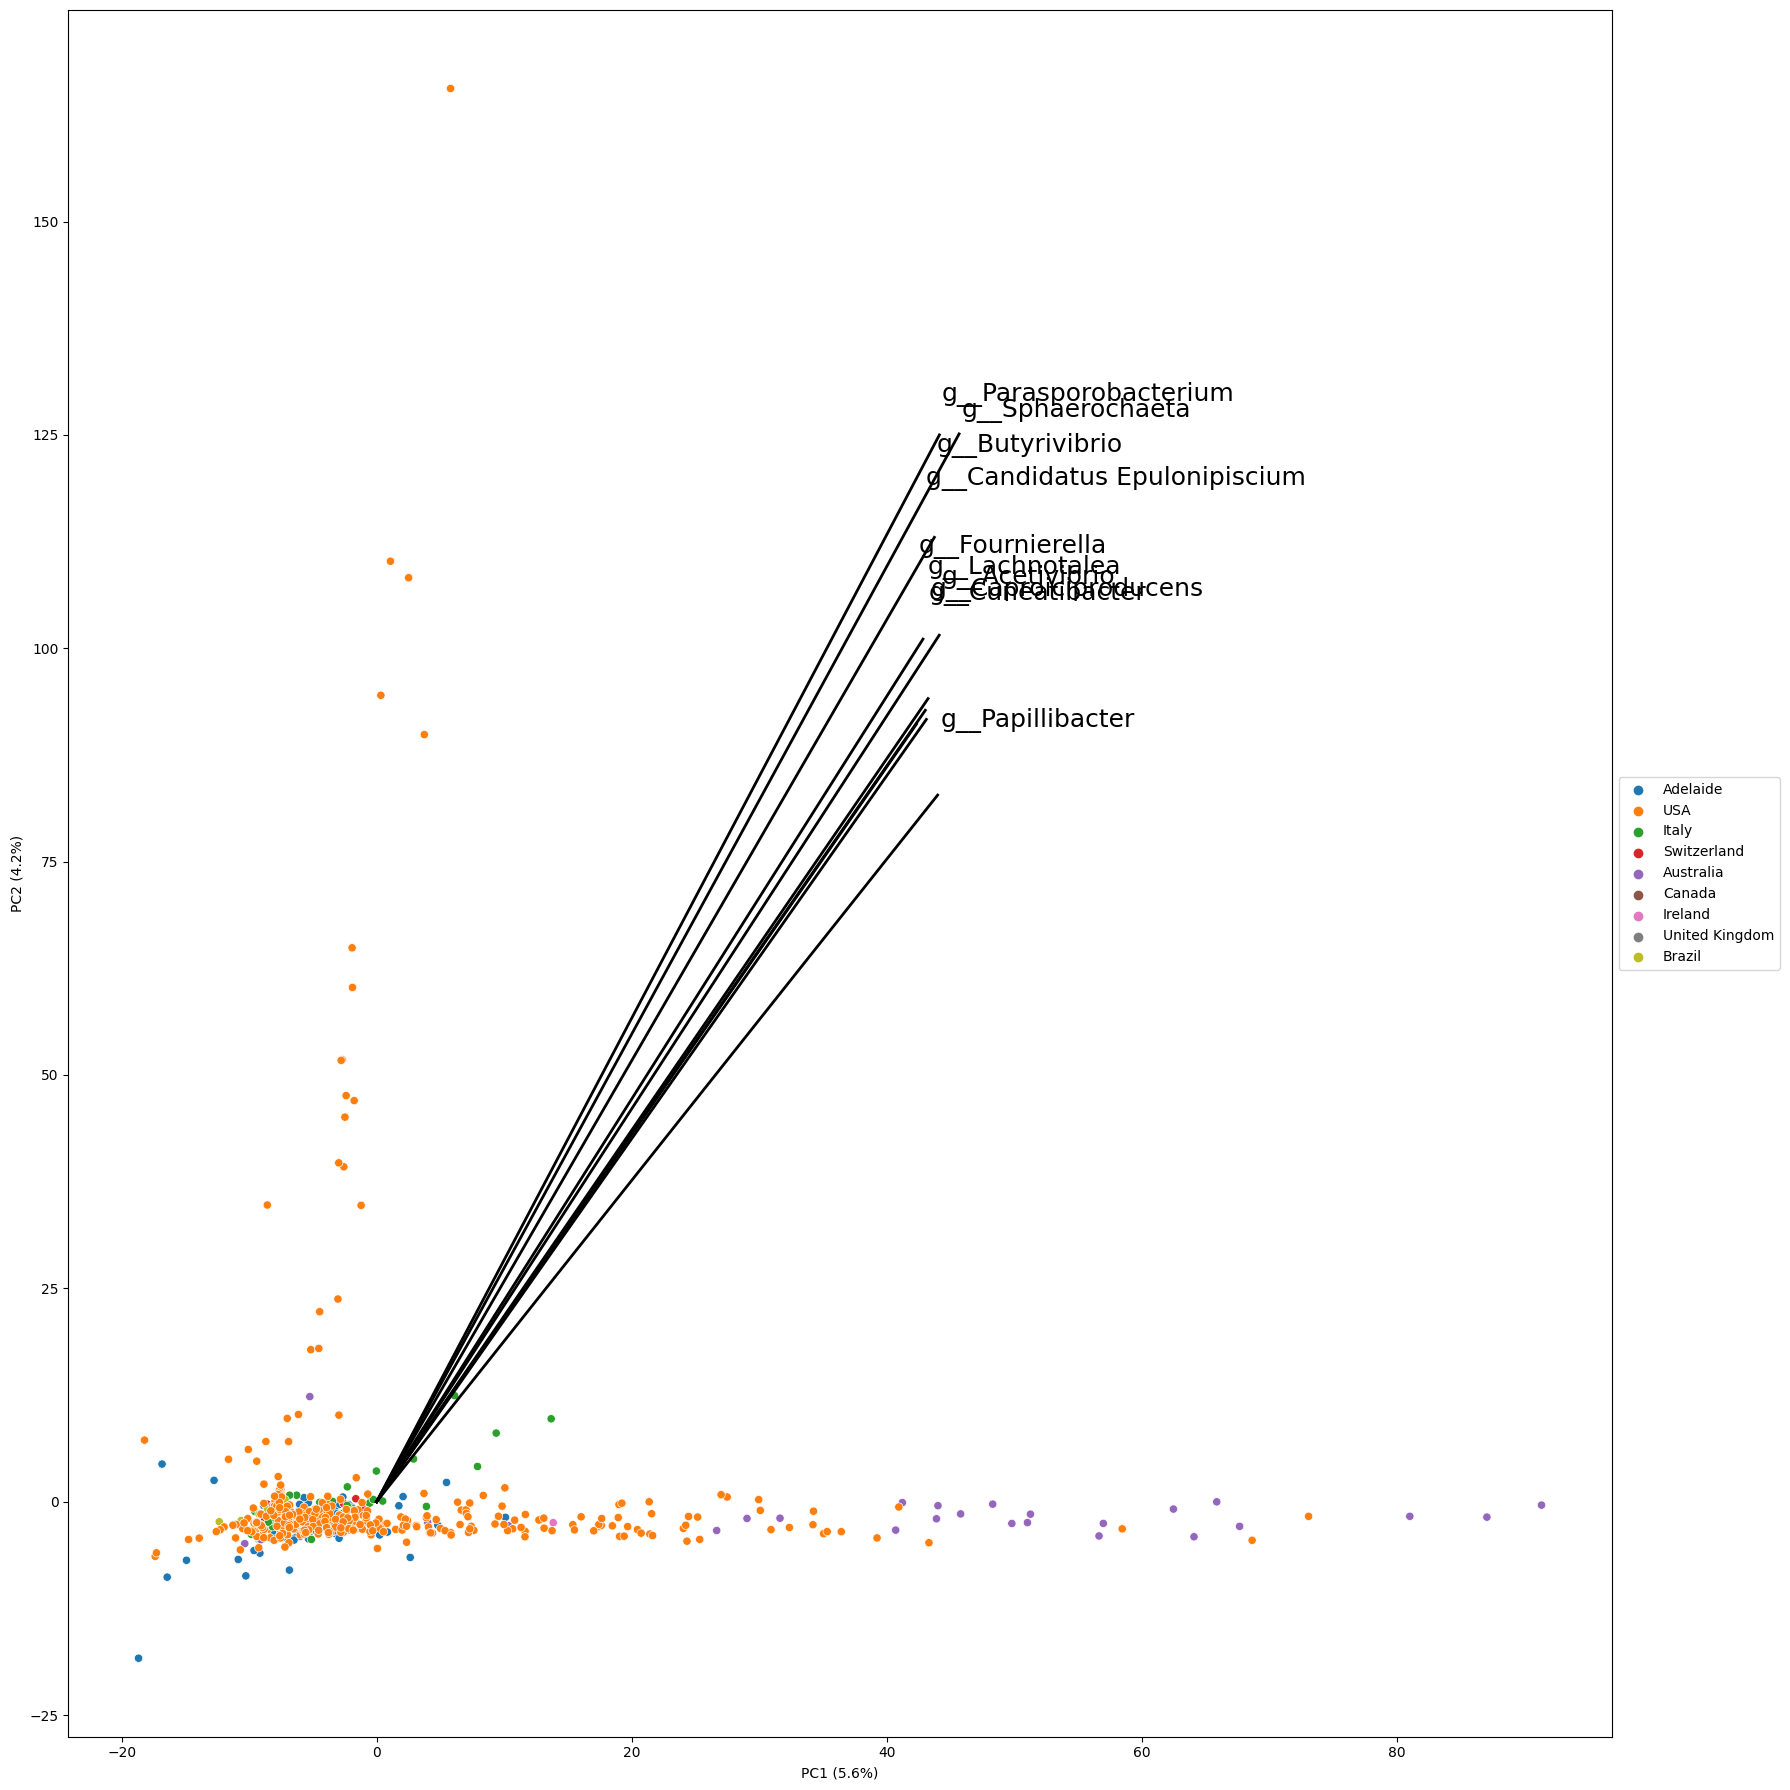

In [31]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.scatterplot(x="PC1", y="PC2", hue='Country', legend=True, data=pcloc, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
l = ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
l = ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
# get the 5 largest loadings
ldf = loadings.loc[loadings.abs().nlargest(10, ['PC1', 'PC2']).index]
# get the maximum values for x and y for the loadings and the PCA
mlx = max(ldf.PC1)
mly = max(ldf.PC2)
mpx = max(pct_df.PC1)
mpy = max(pct_df.PC2)

c = 0
for i, l in ldf.iterrows():
    c+=2
    # scale the loadings to fit the figure
    ex = ( l.PC1 * (mpx/mlx) ) / 2
    ey = ( l.PC2 * (mpy/mly) ) / 2
    # add the text and the line
    plt.text(ex+0.2, ey+c, i, fontsize=18)
    plt.plot([0, ex ], [0, ey ], 'k-', lw=2)

plt.tight_layout()

# Phylum Level (without Eukaryotes)

In [32]:
taxon = pd.read_csv("C:\\Users\\edwa0468\\OneDrive - Flinders\\Projects\\CF\\OtherSequences\\all_taxa.tsv", delimiter="\t")
taxon[taxon['Superkingdom'] == 's__Eukaryota']['Genus']

106809         g__Cafeteria
106810         g__Cafeteria
106811      g__Blastocystis
106812      g__Blastocystis
106813      g__Blastocystis
                ...        
112426         g__Coemansia
112427         g__Linderina
112428     g__Piptocephalis
112429       g__Syncephalis
112430    g__Thamnocephalis
Name: Genus, Length: 5622, dtype: object

### Read the Adelaide data without the Eukaryotes

In [33]:
adl = pd.read_csv("C:\\Users\\edwa0468\\OneDrive - Flinders\\Projects\\CF\\Adelaide\\CF_Taxonomy\\phylum.tsv", delimiter="\t")
adl = adl.rename(columns={"#NAME":"Accession"})
adl = adl.set_index("Accession")
adl = adl[~adl.index.isin(taxon[taxon['Superkingdom'] == 's__Eukaryota']['Phylum'])]
adl = adl.reindex(natsorted(adl.columns), axis=1)
adl = adl.T
# normalise the data by the row sum before we add the label
adl = adl.div(adl.sum(axis=1), axis=0)
adl['geo_loc_name_country_calc'] = "Adelaide"
adl

Accession           p__Candidatus Aerophobetes  p__Candidatus Moranbacteria  \
623361_20180123_S                 2.929748e-06                 1.464874e-06   
634207_20180510_S                 2.620351e-06                 4.526061e-06   
634207_20180517_S                 1.607524e-06                 2.411286e-06   
639354_20171206_S                 0.000000e+00                 0.000000e+00   
642660_20180601_S                 7.472328e-07                 7.472328e-07   
...                                        ...                          ...   
1690154_20180406_S                0.000000e+00                 4.520348e-07   
1723809_20180227_S                2.051949e-06                 4.983306e-06   
1834617_20180501_S                0.000000e+00                 1.314723e-06   
1845116_20180403_S                2.082969e-06                 7.030020e-06   
1862551_20180123_S                0.000000e+00                 0.000000e+00   

Accession           p__candidate division WOR-3  p__candidate division LCP-89  \
623361_20180123_S                  8.300951e-06                      0.000000   
634207_20180510_S                  2.763279e-05                      0.000000   
634207_20180517_S                  2.009405e-05                      0.000000   
639354_20171206_S                  2.169244e-06                      0.000000   
642660_20180601_S                  0.000000e+00                      0.000002   
...                                         ...                           ...   
1690154_20180406_S                 4.520348e-07                      0.000000   
1723809_20180227_S                 4.690170e-06                      0.000000   
1834617_20180501_S                 2.191205e-06                      0.000000   
1845116_20180403_S                 1.067522e-05                      0.000000   
1862551_20180123_S                 1.170424e-05                      0.000000   

Accession           p__Candidatus Marsarchaeota  \
623361_20180123_S                  4.882913e-07   
634207_20180510_S                  1.191069e-06   
634207_20180517_S                  8.037619e-07   
639354_20171206_S                  0.000000e+00   
642660_20180601_S                  0.000000e+00   
...                                         ...   
1690154_20180406_S                 4.520348e-07   
1723809_20180227_S                 0.000000e+00   
1834617_20180501_S                 1.314723e-06   
1845116_20180403_S                 2.603711e-06   
1862551_20180123_S                 0.000000e+00   

Accession           p__Candidatus Harrisonbacteria  p__Aquificae  \
623361_20180123_S                     0.000000e+00      0.000014   
634207_20180510_S                     2.382137e-07      0.000024   
634207_20180517_S                     0.000000e+00      0.000006   
639354_20171206_S                     0.000000e+00      0.000009   
642660_20180601_S                     7.472328e-07      0.000005   
...                                            ...           ...   
1690154_20180406_S                    9.040696e-07      0.000004   
1723809_20180227_S                    0.000000e+00      0.000010   
1834617_20180501_S                    0.000000e+00      0.000007   
1845116_20180403_S                    1.041484e-06      0.000016   
1862551_20180123_S                    0.000000e+00      0.000008   

Accession           p__Fusobacteria  p__Candidatus Fraserbacteria  \
623361_20180123_S          0.034295                  0.000000e+00   
634207_20180510_S          0.049640                  0.000000e+00   
634207_20180517_S          0.011351                  0.000000e+00   
639354_20171206_S          0.017259                  0.000000e+00   
642660_20180601_S          0.003924                  0.000000e+00   
...                             ...                           ...   
1690154_20180406_S         0.003243                  0.000000e+00   
1723809_20180227_S         0.033495                  2.931356e-07   
1834617_20180501_S         

### Read the Worldwide data without the Eukaryotes

In [34]:
wlt = pd.read_csv("C:\\Users\\edwa0468\\OneDrive - Flinders\\Projects\\CF\\OtherSequences\\mmseqs_taxonomy\\phylum.tsv", delimiter="\t")
wlt = wlt.rename(columns={"#NAME":"Accession"})
wlt = wlt.set_index('Accession')
wlt = wlt.reindex(natsorted(wlt.columns), axis=1)
wlt = wlt[~wlt.index.isin(taxon[taxon['Superkingdom'] == 's__Eukaryota']['Phylum'])]
wlt = wlt.T
# normalise the data by the row sum 
wlt = wlt.div(wlt.sum(axis=1), axis=0)
six = pd.read_csv("C:\\Users\\edwa0468\\OneDrive - Flinders\\Projects\\CF\\OtherSequences\\16S.tsv", delimiter="\t")
sr = six[six["Aligned 1 time"] > 1]
wlt = wlt[~wlt.index.isin(sr['Run'])]
wlt

Accession    p__Candidatus Altiarchaeota  p__Candidatus Falkowbacteria  \
SRR1177122                  0.000000e+00                  0.000000e+00   
SRR1180012                  0.000000e+00                  0.000000e+00   
SRR1180013                  0.000000e+00                  0.000000e+00   
SRR3284698                  0.000000e+00                  0.000000e+00   
SRR3284701                  0.000000e+00                  0.000000e+00   
...                                  ...                           ...   
SRR24155132                 4.930587e-07                  7.748065e-07   
SRR24155134                 2.289886e-06                  1.253985e-06   
SRR24155135                 3.571379e-07                  1.339267e-07   
SRR24155136                 0.000000e+00                  4.893263e-07   
SRR24155138                 5.682640e-07                  7.306251e-07   

Accession    p__Abditibacteriota  p__Cressdnaviricota  p__Gemmatimonadetes  \
SRR1177122          0.000000e+00         0.000000e+00             0.000005   
SRR1180012          0.000000e+00         0.000000e+00             0.000007   
SRR1180013          0.000000e+00         0.000000e+00             0.000034   
SRR3284698          0.000000e+00         0.000000e+00             0.000034   
SRR3284701          0.000000e+00         0.000000e+00             0.000030   
...                          ...                  ...                  ...   
SRR24155132         1.408739e-07         0.000000e+00             0.000029   
SRR24155134         0.000000e+00         0.000000e+00             0.000018   
SRR24155135         4.464224e-08         0.000000e+00             0.000005   
SRR24155136         2.796150e-07         6.990376e-08             0.000005   
SRR24155138         1.461250e-06         0.000000e+00             0.000013   

Accession    p__Candidatus Huberarchaea  p__Candidatus Shapirobacteria  \
SRR1177122                          0.0                   0.000000e+00   
SRR1180012                          0.0                   0.000000e+00   
SRR1180013                          0.0                   0.000000e+00   
SRR3284698                          0.0                   0.000000e+00   
SRR3284701                          0.0                   0.000000e+00   
...                                 ...                            ...   
SRR24155132                         0.0                   2.113109e-07   
SRR24155134                         0.0                   5.452110e-08   
SRR24155135                         0.0                   0.000000e+00   
SRR24155136                         0.0                   1.048556e-06   
SRR24155138                         0.0                   2.922500e-06   

Accession    p__Candidatus Berkelbacteria  p__Candidatus Aerophobetes  \
SRR1177122                   4.530052e-06                0.000000e+00   
SRR1180012                   7.007512e-06                0.000000e+00   
SRR1180013                   0.000000e+00                0.000000e+00   
SRR3284698                   0.000000e+00                4.030105e-06   
SRR3284701                   2.742634e-06                0.000000e+00   
...                                   ...                         ...   
SRR24155132                  2.042672e-06                3.240100e-06   
SRR24155134                  1.799196e-06                2.726055e-06   
SRR24155135                  1.473194e-06                4.017802e-07   
SRR24155136                  4.893263e-07                4.893263e-07   
SRR24155138                  1.542431e-05                4.302570e-06   

Accession    p__Candidatus Cloacimonetes  ...  p__Candidatus Riflebacteria  \
SRR1177122                      0.000005  ...                 9.060105e-06   
SRR1180012                      0.000014  ...                 0.000000e+00   
SRR1180013                      0.000034  ...                 0.000000e+00   
SRR3284698                      0.000004  ...                 0.000000e+00   
SRR3284701        

In [35]:
wmd = pd.read_csv("C:\\Users\\edwa0468\\OneDrive - Flinders\\Projects\\CF\\OtherSequences\\bq-results-20230813-093918-1691921491006.tsv", delimiter="\t")
wma = wmd[['Accession', 'geo_loc_name_country_calc']]
wma = wma.set_index("Accession")
wldj = wlt.join(wma,  how='inner')
comb = pd.concat([adl, wldj], axis=0)
locs = comb[['geo_loc_name_country_calc']]
locs = locs.rename(columns={"geo_loc_name_country_calc": "Country"})
df = comb.drop(['geo_loc_name_country_calc'], axis=1)
df = df.dropna(axis=1)
df

p__Candidatus Aerophobetes  p__Candidatus Moranbacteria  \
623361_20180123_S                2.929748e-06                 1.464874e-06   
634207_20180510_S                2.620351e-06                 4.526061e-06   
634207_20180517_S                1.607524e-06                 2.411286e-06   
639354_20171206_S                0.000000e+00                 0.000000e+00   
642660_20180601_S                7.472328e-07                 7.472328e-07   
...                                       ...                          ...   
SRR24155132                      3.240100e-06                 1.056554e-05   
SRR24155134                      2.726055e-06                 6.051842e-06   
SRR24155135                      4.017802e-07                 6.964190e-06   
SRR24155136                      4.893263e-07                 1.817498e-06   
SRR24155138                      4.302570e-06                 1.972688e-05   

                   p__candidate division WOR-3  p__candidate division LCP-89  \
623361_20180123_S                 8.300951e-06                  0.000000e+00   
634207_20180510_S                 2.763279e-05                  0.000000e+00   
634207_20180517_S                 2.009405e-05                  0.000000e+00   
639354_20171206_S                 2.169244e-06                  0.000000e+00   
642660_20180601_S                 0.000000e+00                  2.241698e-06   
...                                        ...                           ...   
SRR24155132                       7.325443e-06                  0.000000e+00   
SRR24155134                       1.690154e-06                  5.452110e-08   
SRR24155135                       1.339267e-06                  0.000000e+00   
SRR24155136                       6.990376e-07                  6.990376e-08   
SRR24155138                       8.199237e-06                  8.118057e-08   

                   p__Candidatus Marsarchaeota  \
623361_20180123_S                 4.882913e-07   
634207_20180510_S                 1.191069e-06   
634207_20180517_S                 8.037619e-07   
639354_20171206_S                 0.000000e+00   
642660_20180601_S                 0.000000e+00   
...                                        ...   
SRR24155132                       2.817478e-07   
SRR24155134                       6.542532e-07   
SRR24155135                       4.464224e-08   
SRR24155136                       9.786526e-07   
SRR24155138                       8.118057e-08   

                   p__Candidatus Harrisonbacteria  p__Aquificae  \
623361_20180123_S                    0.000000e+00      0.000014   
634207_20180510_S                    2.382137e-07      0.000024   
634207_20180517_S                    0.000000e+00      0.000006   
639354_20171206_S                    0.000000e+00      0.000009   
642660_20180601_S                    7.472328e-07      0.000005   
...                                           ...           ...   
SRR24155132                          0.000000e+00      0.000011   
SRR24155134                          3.271266e-07      0.000009   
SRR24155135                          1.044628e-05      0.000002   
SRR24155136                          9.087488e-07      0.000013   
SRR24155138                          0.000000e+00      0.000009   

                   p__Fusobacteria  p__Candidatus Fraserbacteria  \
623361_20180123_S         0.034295                  0.000000e+00   
634207_20180510_S         0.049640                  0.000000e+00   
634207_20180517_S         0.011351                  0.000000e+00   
639354_20171206_S         0.017259                  0.000000e+00   
642660_20180601_S         0.003924                  0.000000e+00   
...                            ...                           ...   
SRR24155132               0.000319                  0.000000e+00   
SRR24155134               0.000330                  1.090422e-07   
SRR24155135               0.000085                  4.464224e-08   
SRR24155136               0.000290 

In [36]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
pca = PCA(n_components=4)
pca.fit(df_scaled)
dft_pca = pca.transform(df_scaled)
zipped = list(zip(dft_pca[:,0],
                  dft_pca[:,1],
                  dft_pca[:,2],
                  dft_pca[:,3],
                  list(df.index),
                 ))
pct_df = pd.DataFrame(zipped, columns=['PC1', 'PC2', 'PC3', 'PC4', "Accession"])
pcloc = pct_df.set_index("Accession").join(locs, how="inner")
pcloc = pcloc[pcloc['Country'] != 'uncalculated']
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=df.columns)
loadings.head(3)

PC1       PC2       PC3       PC4
p__Candidatus Aerophobetes   0.078660  0.024887 -0.066636 -0.054100
p__Candidatus Moranbacteria  0.120630 -0.042651 -0.011572  0.035578
p__candidate division WOR-3  0.144431 -0.042525 -0.075931 -0.018032

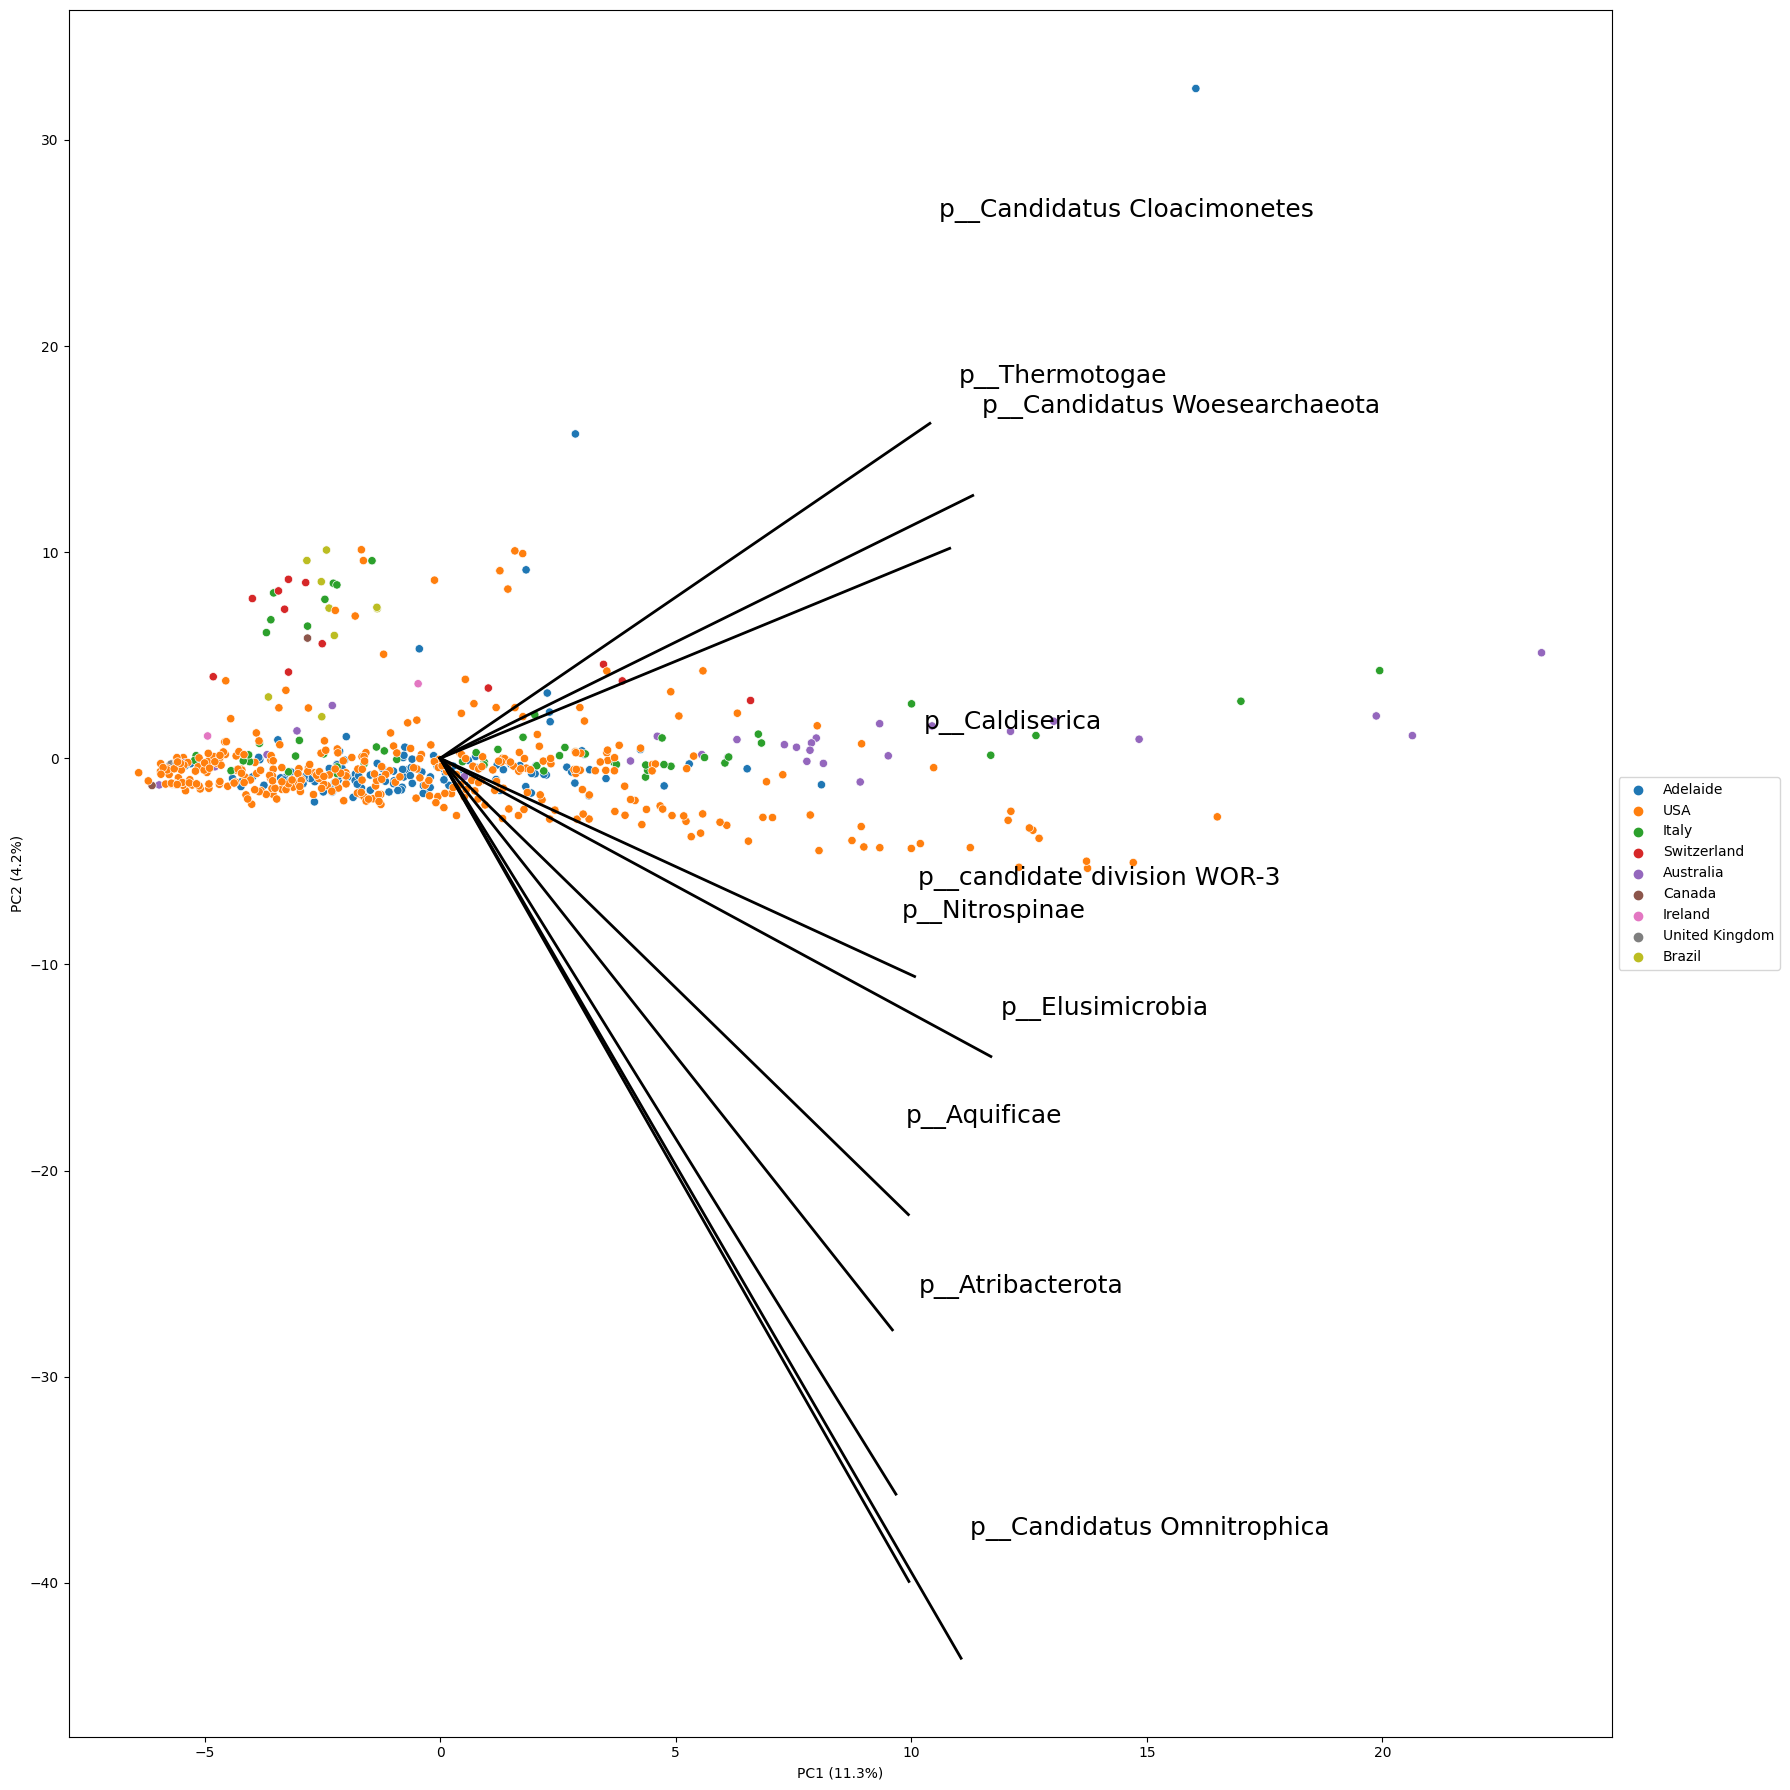

In [37]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.scatterplot(x="PC1", y="PC2", hue='Country', legend=True, data=pcloc, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
l = ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
l = ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
# get the 5 largest loadings
ldf = loadings.loc[loadings.abs().nlargest(10, ['PC1', 'PC2']).index]
# get the maximum values for x and y for the loadings and the PCA
mlx = max(ldf.PC1)
mly = max(ldf.PC2)
mpx = max(pct_df.PC1)
mpy = max(pct_df.PC2)

c = 0
for i, l in ldf.iterrows():
    c+=2
    # scale the loadings to fit the figure
    ex = ( l.PC1 * (mpx/mlx) ) / 2
    ey = ( l.PC2 * (mpy/mly) ) / 2
    # add the text and the line
    plt.text(ex+0.2, ey+c, i, fontsize=18)
    plt.plot([0, ex ], [0, ey ], 'k-', lw=2)

plt.tight_layout()
fig.savefig("Worldwide_phylum.png")

# MASH Distances

I calculated all pairwise mash distances. Distances are for the R1 and R2 reads.

In [38]:
msh = pd.read_csv("C:\\Users\\edwa0468\\OneDrive - Flinders\\Projects\\CF\\OtherSequences\\pairwise_mash_distances.no16s.tsv.gz", compression='gzip', delimiter="\t")
msh

From                 To  Distance        p-value  \
0             SRR10267760        SRR10267760  0.000000   0.000000e+00   
1             SRR10267761        SRR10267760  0.122140  9.205380e-140   
2             SRR10267762        SRR10267760  0.098138  9.371560e-257   
3             SRR10267763        SRR10267760  0.109331  2.501330e-204   
4             SRR10267765        SRR10267760  0.128270  2.206470e-136   
...                   ...                ...       ...            ...   
736159  895293_20180502_S  983493_20180123_S  0.098138  4.563390e-237   
736160  896213_20180427_S  983493_20180123_S  0.154223   9.761470e-69   
736161  913873_20180417_S  983493_20180123_S  0.178173   6.960310e-42   
736162  980574_20180403_S  983493_20180123_S  0.111073  7.693610e-173   
736163  983493_20180123_S  983493_20180123_S  0.000000   0.000000e+00   

            kmers  
0       1000/1000  
1         40/1000  
2         68/1000  
3         53/1000  
4         35/1000  
...           ...  
736159    68/1000  
736160    20/1000  
736161    12/1000  
736162    51/1000  
736163  1000/1000  

[736164 rows x 5 columns]

In [39]:
mshp = pd.pivot(msh, index="From", columns="To", values='Distance')
mshp

To                  1068841_20180306_S  1112926_20171212_S  \
From                                                         
1068841_20180306_S            0.000000            0.077463   
1112926_20171212_S            0.077463            0.000000   
1128691_20171206_S            0.167688            0.111073   
1128691_20171218_S            0.161822            0.114780   
1128691_20180116_S            0.219531            0.133864   
...                                ...                 ...   
SRR8482189                    0.112887            0.096846   
SRR8482190                    0.114780            0.092618   
SRR9701179                    0.263022            0.230110   
SRR9701183                    1.000000            0.295981   
SRR9701189                    0.263022            0.230110   

To                  1128691_20171206_S  1128691_20171218_S  \
From                                                         
1068841_20180306_S            0.167688            0.161822   
1112926_20171212_S            0.111073            0.114780   
1128691_20171206_S            0.000000            0.051920   
1128691_20171218_S            0.051920            0.000000   
1128691_20180116_S            0.051725            0.054997   
...                                ...                 ...   
SRR8482189                    0.108487            0.107658   
SRR8482190                    0.102997            0.102997   
SRR9701179                    0.295981            0.263022   
SRR9701183                    1.000000            1.000000   
SRR9701189                    1.000000            1.000000   

To                  1128691_20180116_S  1162967_20180116_S  \
From                                                         
1068841_20180306_S            0.219531            0.149777   
1112926_20171212_S            0.133864            0.104495   
1128691_20171206_S            0.051725            0.063168   
1128691_20171218_S            0.054997            0.066265   
1128691_20180116_S            0.000000            0.063987   
...                                ...                 ...   
SRR8482189                    0.108487            0.098798   
SRR8482190                    0.102268            0.096846   
SRR9701179                    1.000000            0.295981   
SRR9701183                    1.000000            1.000000   
SRR9701189                    1.000000            1.000000   

To                  1255498_20171212_S  1282052_20180206_S  \
From                                                         
1068841_20180306_S            0.088783            0.113823   
1112926_20171212_S            0.081179            0.072306   
1128691_20171206_S            0.136948            0.106047   
1128691_20171218_S            0.135380            0.100846   
1128691_20180116_S            0.219531            0.115759   
...                                ...                 ...   
SRR8482189                    0.110193            0.098798   
SRR8482190                    0.115759            0.100152   
SRR9701179                    0.243761            0.243761   
SRR9701183                    0.295981            1.000000   
SRR9701189                    0.243761            0.295981   

To                  1316935_20180417_S  1316979_20171215_S  ...  SRR8482183  \
From                                                        ...               
1068841_20180306_S            0.088264            0.094378  ...    0.186761   
1112926_20171212_S            0.083404            0.088264  ...    0.125715   
1128691_20171206_S            0.130979            0.164662  ...    0.055428   
1128691_20171218_S            0.125715            0.143830  ...    0.057440   
1128691_20180116_S            0.138572            0.210897  ...    0.052117   
...                                ...                 ...  ...         ...   
SRR8482189                    0.093196            0.111970  ...    0.094378   
SRR8482190                    0.096846            0.115759  .

c:\workspace\edwa0468\githubs\edwardslab\venv_win\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\workspace\edwa0468\githubs\edwardslab\venv_win\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\workspace\edwa0468\githubs\edwardslab\venv_win\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\workspace\edwa0468\githubs\edwardslab\venv_win\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method

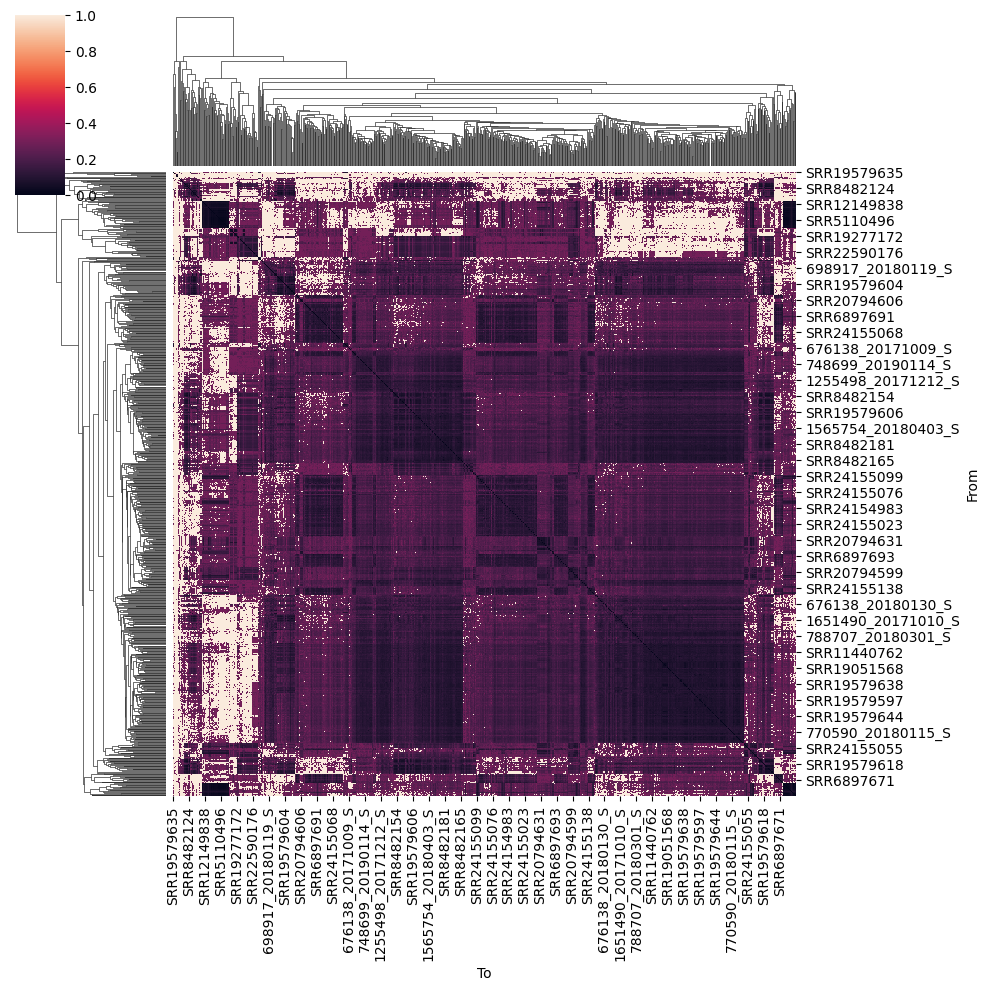

In [40]:
sns.clustermap(mshp)

In [41]:
locs

Country
623361_20180123_S  Adelaide
634207_20180510_S  Adelaide
634207_20180517_S  Adelaide
639354_20171206_S  Adelaide
642660_20180601_S  Adelaide
...                     ...
SRR24155132             USA
SRR24155134             USA
SRR24155135             USA
SRR24155136             USA
SRR24155138             USA

[611 rows x 1 columns]

In [42]:
msf = msh.join(locs, on="From", how="inner")
msf = msf.rename(columns={"Country": "From Country"})
mst = msf.join(locs, on="To", how="inner")
mst = mst.rename(columns={"Country": "To Country"})
mst

From                 To  Distance        p-value  \
14603         SRR10590818        SRR10590818  0.000000   0.000000e+00   
14604         SRR11361785        SRR10590818  0.243761   1.534620e-05   
14606         SRR11361787        SRR10590818  0.243761   1.053230e-05   
14608         SRR11361790        SRR10590818  0.243761   1.386180e-05   
14611         SRR11361794        SRR10590818  0.243761   8.050930e-06   
...                   ...                ...       ...            ...   
736159  895293_20180502_S  983493_20180123_S  0.098138  4.563390e-237   
736160  896213_20180427_S  983493_20180123_S  0.154223   9.761470e-69   
736161  913873_20180417_S  983493_20180123_S  0.178173   6.960310e-42   
736162  980574_20180403_S  983493_20180123_S  0.111073  7.693610e-173   
736163  983493_20180123_S  983493_20180123_S  0.000000   0.000000e+00   

            kmers    From Country To Country  
14603   1000/1000          Canada     Canada  
14604      3/1000  United Kingdom     Canada  
14606      3/1000  United Kingdom     Canada  
14608      3/1000  United Kingdom     Canada  
14611      3/1000  United Kingdom     Canada  
...           ...             ...        ...  
736159    68/1000        Adelaide   Adelaide  
736160    20/1000        Adelaide   Adelaide  
736161    12/1000        Adelaide   Adelaide  
736162    51/1000        Adelaide   Adelaide  
736163  1000/1000        Adelaide   Adelaide  

[275625 rows x 7 columns]

In [43]:
mstp = mst.pivot(index="From", columns="To", values="Distance")
mstp

To                  1068841_20180306_S  1112926_20171212_S  \
From                                                         
1068841_20180306_S            0.000000            0.077463   
1112926_20171212_S            0.077463            0.000000   
1128691_20171206_S            0.167688            0.111073   
1128691_20171218_S            0.161822            0.114780   
1128691_20180116_S            0.219531            0.133864   
...                                ...                 ...   
SRR8482183                    0.186761            0.125715   
SRR8482185                    0.219531            0.132399   
SRR8482187                    0.129604            0.099470   
SRR8482190                    0.114780            0.092618   
SRR9701183                    1.000000            0.295981   

To                  1128691_20171206_S  1128691_20171218_S  \
From                                                         
1068841_20180306_S            0.167688            0.161822   
1112926_20171212_S            0.111073            0.114780   
1128691_20171206_S            0.000000            0.051920   
1128691_20171218_S            0.051920            0.000000   
1128691_20180116_S            0.051725            0.054997   
...                                ...                 ...   
SRR8482183                    0.055428            0.057440   
SRR8482185                    0.055865            0.056983   
SRR8482187                    0.075541            0.079484   
SRR8482190                    0.102997            0.102997   
SRR9701183                    1.000000            1.000000   

To                  1128691_20180116_S  1162967_20180116_S  \
From                                                         
1068841_20180306_S            0.219531            0.149777   
1112926_20171212_S            0.133864            0.104495   
1128691_20171206_S            0.051725            0.063168   
1128691_20171218_S            0.054997            0.066265   
1128691_20180116_S            0.000000            0.063987   
...                                ...                 ...   
SRR8482183                    0.052117            0.059330   
SRR8482185                    0.047344            0.059330   
SRR8482187                    0.074070            0.074070   
SRR8482190                    0.102268            0.096846   
SRR9701183                    1.000000            1.000000   

To                  1255498_20171212_S  1282052_20180206_S  \
From                                                         
1068841_20180306_S            0.088783            0.113823   
1112926_20171212_S            0.081179            0.072306   
1128691_20171206_S            0.136948            0.106047   
1128691_20171218_S            0.135380            0.100846   
1128691_20180116_S            0.219531            0.115759   
...                                ...                 ...   
SRR8482183                    0.164662            0.110193   
SRR8482185                    0.243761            0.115759   
SRR8482187                    0.135380            0.101551   
SRR8482190                    0.115759            0.100152   
SRR9701183                    0.295981            1.000000   

To                  1316935_20180417_S  1316979_20171215_S  ...  SRR8482177  \
From                                                        ...               
1068841_20180306_S            0.088264            0.094378  ...    0.178173   
1112926_20171212_S            0.083404            0.088264  ...    0.145727   
1128691_20171206_S            0.130979            0.164662  ...    0.156619   
1128691_20171218_S            0.125715            0.143830  ...    0.147707   
1128691_20180116_S            0.138572            0.210897  ...    0.154223   
...                                ...                 ...  ...         ...   
SRR8482183                    0.130979            0.191731  ...    0.124491   
SRR8482185                    0.142009            0.243761  .

In [44]:
mst['From Country'].unique()

array(['Canada', 'United Kingdom', 'USA', 'Brazil', 'Australia', 'Italy',
       'Switzerland', 'Ireland', 'Adelaide'], dtype=object)

In [45]:
lut = dict(zip(mst['From Country'].unique(), sns.color_palette()))
rc = mst['From Country'].map(lut)
cc = mst['To Country'].map(lut)

In [46]:
lut = dict(zip(mst['From Country'].unique(), sns.color_palette()))
rc = locs.loc[mstp.index]['Country'].map(lut)
cc = locs.loc[mstp.columns]['Country'].map(lut)

c:\workspace\edwa0468\githubs\edwardslab\venv_win\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\workspace\edwa0468\githubs\edwardslab\venv_win\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\workspace\edwa0468\githubs\edwardslab\venv_win\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\workspace\edwa0468\githubs\edwardslab\venv_win\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method

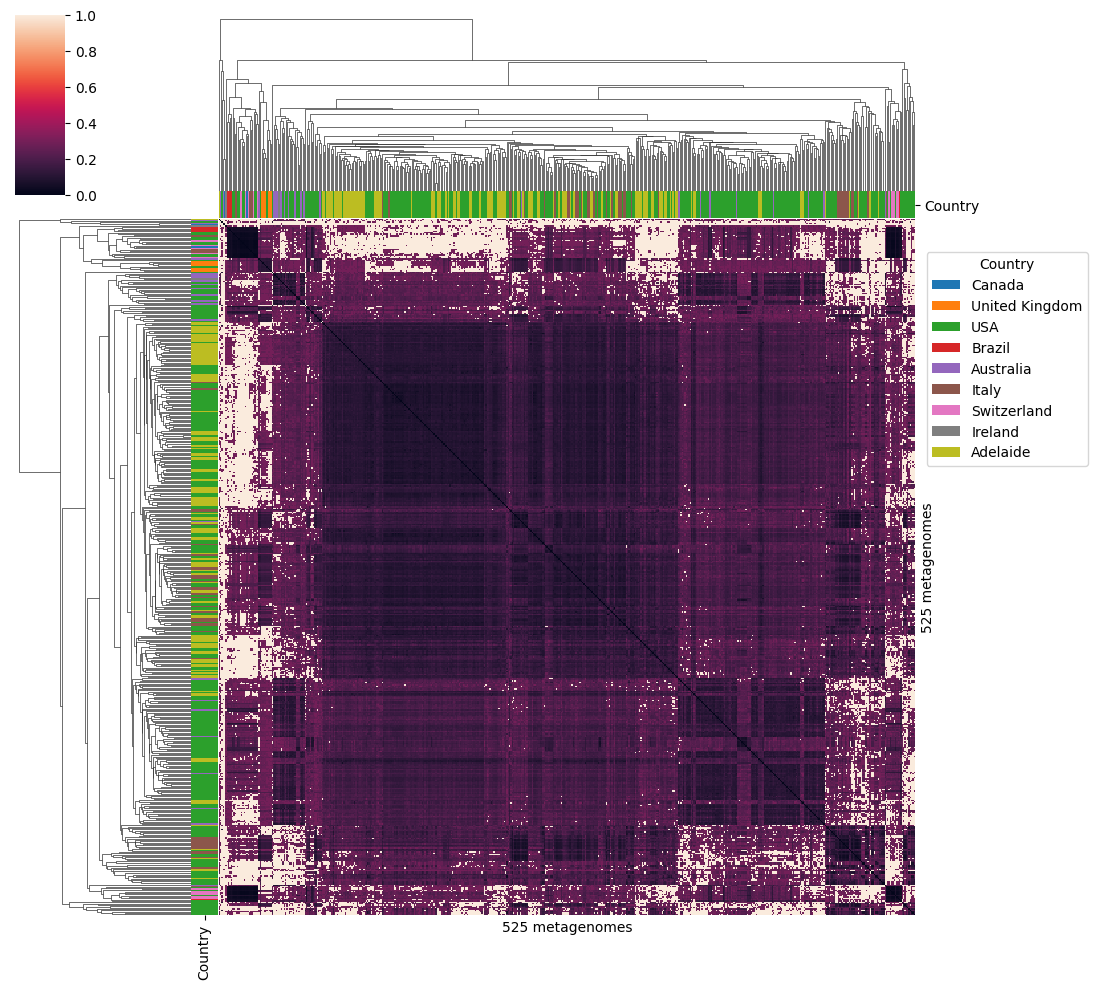

In [47]:
cg = sns.clustermap(mstp,
                   row_cluster=True, col_cluster=True, 
                   row_colors=rc, col_colors=cc,
                   yticklabels=False,xticklabels=False)
ax = cg.ax_heatmap
ax.set_ylabel("525 metagenomes")
ax.set_xlabel("525 metagenomes")
handles = [Patch(facecolor=lut[name]) for name in lut]
l = plt.legend(handles, lut, title='Country',
           bbox_to_anchor=(1.1, 0.75), bbox_transform=plt.gcf().transFigure, loc='upper right')

plt.tight_layout()
cg.savefig("mash_distances.png")

c:\workspace\edwa0468\githubs\edwardslab\venv_win\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\workspace\edwa0468\githubs\edwardslab\venv_win\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\workspace\edwa0468\githubs\edwardslab\venv_win\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\workspace\edwa0468\githubs\edwardslab\venv_win\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method

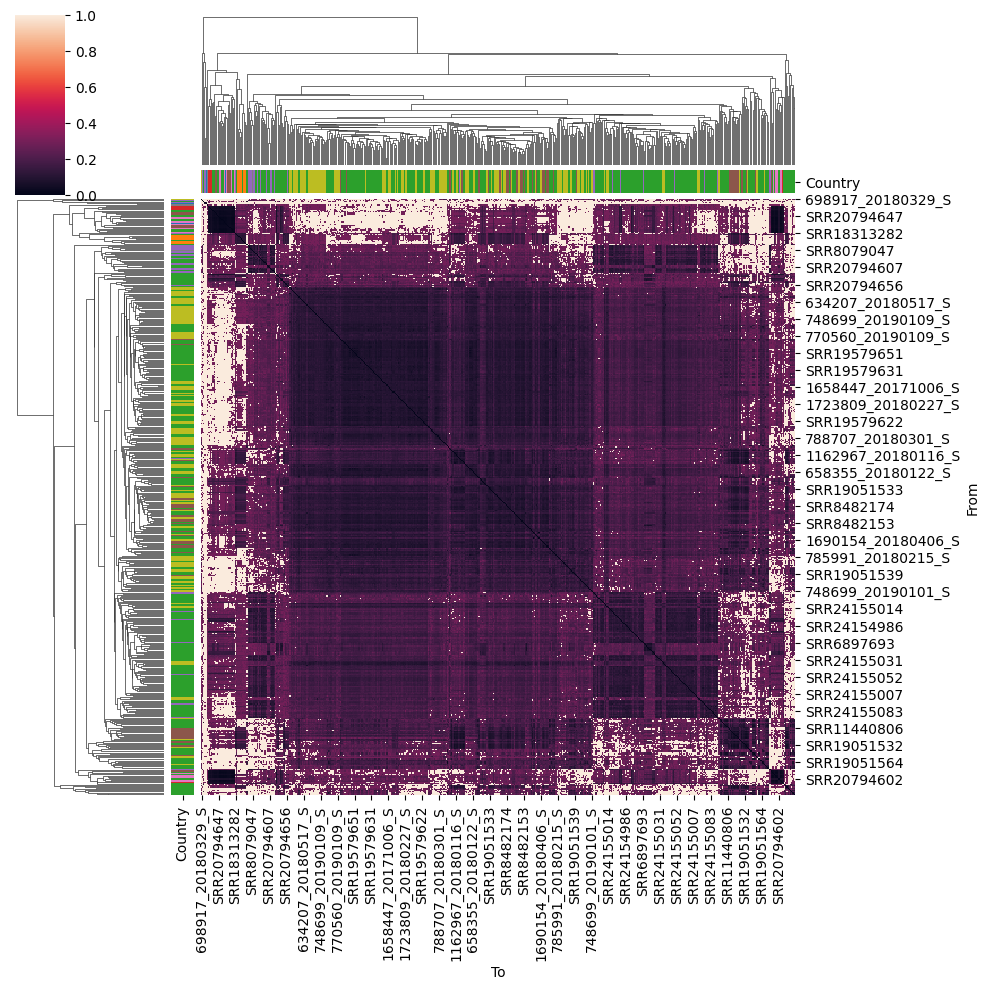

In [48]:
g = sns.clustermap(mstp, 
               row_cluster=True, col_cluster=True, 
               row_colors=rc, col_colors=cc)